<a href="https://colab.research.google.com/github/Angelaruiga/python_/blob/main/Check_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.	Análisis Exploratorio de Datos (EDA):

## Importando librerias

In [ ]:
import pandas as pd
import numpy as np
import io

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## Lectura csv en drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Detectando nans desde el comienzo
# na_filter -> muestra valores nulos
# keep_default_na -> interpreta todas las cadenas de caracteres 'NaN', 'NULL', 'N/A', etc. como nulos
df_alojamiento= pd.read_csv('/content/drive/MyDrive/Hosting/Hosting/data/alojamientos-turisticos-sample.csv', na_filter = True, keep_default_na = True)
display(df_alojamiento.head(5))
print(df_alojamiento.shape)

,apartment_id,md5,name,description,host_id,neighborhood_overview,neighbourhood_name,neighbourhood_district,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_instant_bookable,reviews_per_month,country,city,insert_date
0,36187629,66fff4225feb2ddf104ea38f76e4bff1,Piso reformado excelente ubicacion,Apartamento reformado hace dos meses en el Cab...,261787331,NaN,BETERO,POBLATS MARITIMS,3.947.149,-3.346,...,10.0,10.0,10.0,10.0,NaN,True,0.22,spain,valencia,2019-12-31
1,5388904,48790b4dd865e98cc1f5302a2bba1a50,Nice Room in a Penthouse,The apartment is fully equipped. Large bathroo...,20843074,NaN,la Nova Esquerra de l'Eixample,Eixample,4.138.353,215.388,...,8.0,10.0,10.0,10.0,NaN,False,0.01,spain,barcelona,2021-01-12
2,39982406,d3a60e8898bd8ddce4325c8d3d6af7c8,LUXURY 5 BEDROOM APARTMENT IN MONCLOA-ARAVACA,Luxury Apartment located in a priveleged zone ...,308267305,Very quiet residential area in a Posh area of ...,El Plantío,Moncloa - Aravaca,4.046.614,-380.948,...,NaN,NaN,NaN,NaN,VT-12318,True,NaN,spain,madrid,2020-01-10
3,19344018,e2f33bae8c814924e8ce7e6efa8e7245,Habitación zona Atocha,Pareja joven alquila habitación para semana de...,135531703,NaN,Palos de Moguer,Arganzuela,4.040.507.011.669.010,-3.693.182.634.598.120,...,NaN,NaN,NaN,NaN,NaN,True,NaN,spain,madrid,2019-01-14
4,17218380,11295740bea58c9ae080a459cc8094c5,Spacious villa for rent with private pool,This large holiday home is located in a quiet ...,8345284,L'Escala has a strategic location - everything...,L'Escala,NaN,4.210.782.265.163.360,3.141.601.421.913.330,...,8.0,9.0,8.0,8.0,HUTG-020958,True,0.29,spain,girona,2018-10-20


(10000, 40)


keep_default_na: If keep_default_na is True, and na_values are not specified, only the default NaN values are used for parsing. Ver "na_values".

## Compresión de la estructura de los datos

In [ ]:
# Primeros registros
df_alojamiento.head()

,apartment_id,md5,name,description,host_id,neighborhood_overview,neighbourhood_name,neighbourhood_district,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_instant_bookable,reviews_per_month,country,city,insert_date
0,36187629,66fff4225feb2ddf104ea38f76e4bff1,Piso reformado excelente ubicacion,Apartamento reformado hace dos meses en el Cab...,261787331,NaN,BETERO,POBLATS MARITIMS,3.947.149,-3.346,...,10.0,10.0,10.0,10.0,NaN,True,0.22,spain,valencia,2019-12-31
1,5388904,48790b4dd865e98cc1f5302a2bba1a50,Nice Room in a Penthouse,The apartment is fully equipped. Large bathroo...,20843074,NaN,la Nova Esquerra de l'Eixample,Eixample,4.138.353,215.388,...,8.0,10.0,10.0,10.0,NaN,False,0.01,spain,barcelona,2021-01-12
2,39982406,d3a60e8898bd8ddce4325c8d3d6af7c8,LUXURY 5 BEDROOM APARTMENT IN MONCLOA-ARAVACA,Luxury Apartment located in a priveleged zone ...,308267305,Very quiet residential area in a Posh area of ...,El Plantío,Moncloa - Aravaca,4.046.614,-380.948,...,NaN,NaN,NaN,NaN,VT-12318,True,NaN,spain,madrid,2020-01-10
3,19344018,e2f33bae8c814924e8ce7e6efa8e7245,Habitación zona Atocha,Pareja joven alquila habitación para semana de...,135531703,NaN,Palos de Moguer,Arganzuela,4.040.507.011.669.010,-3.693.182.634.598.120,...,NaN,NaN,NaN,NaN,NaN,True,NaN,spain,madrid,2019-01-14
4,17218380,11295740bea58c9ae080a459cc8094c5,Spacious villa for rent with private pool,This large holiday home is located in a quiet ...,8345284,L'Escala has a strategic location - everything...,L'Escala,NaN,4.210.782.265.163.360,3.141.601.421.913.330,...,8.0,9.0,8.0,8.0,HUTG-020958,True,0.29,spain,girona,2018-10-20


In [ ]:
# Ultimos registros
df_alojamiento.tail(9)

,apartment_id,md5,name,description,host_id,neighborhood_overview,neighbourhood_name,neighbourhood_district,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_instant_bookable,reviews_per_month,country,city,insert_date
9991,35555761,e5de2d7b9414944df2adbb9cdc859190,"Apartment with terrace, Views, WiFi and Parking!",Luxe appartement met een prachtig uitzicht op ...,19556457,"Het appartement is erg centraal gelegen, heeft...",PENYA-ROJA,CAMINS AL GRAU,3.945.579,-34.563,...,10.0,10.0,10.0,10.0,NaN,False,2.22,spain,valencia,2019-09-30
9992,22454692,f8c848e9f6ad7890bed8c600cbdfa378,Moderno apartamento a estrenar - WINDROSE 1,"Nuestro piso está bien situado, a 10 minutos d...",88589135,NaN,Lucero,Latina,4.040.732,-374.661,...,10.0,9.0,9.0,9.0,VT-5943,True,3.35,spain,madrid,2020-03-17
9993,41810267,90079bc4d2f66eecf22309f4f8ffd883,Nice & Modern Bedroom 15 min walking to the beach,Nice and modern BEDROOM for 3 people in the Go...,330366654,My place has the perfect location for your vis...,el Barri Gòtic,Ciutat Vella,4.138.191,218.064,...,10.0,10.0,10.0,10.0,Exempt,True,1.25,spain,NaN,2020-12-16
9994,3701970,c05d1d8c876ad4e8388108a3f7c0af6e,NaN,"Apartamento muy bonito recién reformado,con ma...",18868714,Es una zona residencial muy tranquila y famili...,Ciutadella de Menorca,NaN,3.997.074.305.463.820,3.834.107.329.901.470,...,9.0,10.0,9.0,8.0,NaN,True,0.51,spain,menorca,2018-08-29
9995,3809219,43b4ea2c37630c989472a2ef08210a87,Unique house in a very central location in Soller,"(Es Mercat) Is a beautiful house, just in fron...",18828820,Beautiful neighborhood in the center of soller...,Sóller,NaN,3.976.618.084.718.320,27.144.149.464.589.800,...,10.0,10.0,10.0,10.0,ET/7451,True,3.09,spain,mallorca,2018-12-18
9996,25280928,d4710f3312c051861df5bd882645ed47,Modern apartment in Legazpi,"Apartamento muy céntrico, tranquilo y luminoso...",190957904,NaN,Chopera,Arganzuela,4.039.344,-369.582,...,10.0,10.0,9.0,9.0,VT-8435,True,1.51,spain,madrid,2020-10-17
9997,4845783,006dee31a4b3337dc403ea03a1a1e082,"Study PAZ, Lloret de Mar (beach Fenals 250 m)",New and bright apartment in Lloret de Mar. Per...,24928257,"Located in the popular district of Fenals, is ...",Lloret de Mar,NaN,4.169.894,2.8302,...,10.0,10.0,10.0,10.0,NaN,True,0.99,spain,girona,2019-03-30
9998,2495345,960a3998f8214c181146825ac6b85934,Double room Balcony SUPER CENTRAL (Born),Cosy and full of light room with the balcony i...,12617302,Аpartment is located at the heart of the histo...,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,4.138.589.765.360.200,2.180.951.140.115.550,...,10.0,9.0,9.0,9.0,NaN,False,1.68,spain,barcelona,2017-12-09
9999,23441002,925eb8188fd68d959448158d47742f5a,Magnífico apartamento en centro histórico 3ºA,Amplio y luminoso apartamento de un dormitorio...,174869309,El apartamento se ubica en el conocido y típic...,Centro,NaN,3.672.485,-441.414,...,10.0,9.0,10.0,9.0,CTC-2017149580,True,5.13,spain,malaga,2020-01-31


In [ ]:
# Registros aleatorios
df_alojamiento.sample(10)

,apartment_id,md5,name,description,host_id,neighborhood_overview,neighbourhood_name,neighbourhood_district,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_instant_bookable,reviews_per_month,country,city,insert_date
7147,5158395,aa11ae7a5b4753b0974551c4ac8be5f1,Casa rústica en Madremanya / Girona - Costa Brava,Magnífica casa rústica con piscina en la campi...,26677141,Nuestro barrio es muy tranquilo y bello: una d...,Madremanya,NaN,4.199.347,295.708,...,10.0,10.0,10.0,10.0,HUTG-019519,False,0.24,spain,girona,2021-01-31
2377,33448132,33dcd06140cddb8e5931f1cf87d7756d,Mar salada apartments,Luminoso apartamento de 40 m2 en primera línea...,238654973,"Ubicado cerca de un parque acuático (2km.), a...",Alcúdia,NaN,3.983.461,312.102,...,8.0,9.0,10.0,10.0,NaN,True,0.09,spain,mallorca,2021-01-16
3017,30492058,45a2fde9fd68fe31e437269677053cc5,"Air Conditioned, Central, Clean, w/ balcony (w)",This is a beautiful room with private balcony ...,228118160,NaN,el Raval,Ciutat Vella,4.138.151,216.881,...,10.0,9.0,10.0,9.0,Exempt,False,4.43,spain,barcelona,2019-11-09
5444,22028868,509bfd934bfbe256673ed4773f7634dd,NAUTIC GOLF A 101,The apartment in Pals has 2 bedrooms and has c...,95415596,NaN,Pals,NaN,4.200.186,319.325,...,NaN,NaN,NaN,NaN,​HUTG: 008893-24​,True,NaN,spain,girona,2020-05-28
4065,5240114,8161df67a6c83ca051379fcf6b9852c2,Apartamento Centro de Barcelona,We rent a private room of our new apartment wi...,17529040,NaN,Sant Antoni,Eixample,4.138.037.629.991.550,2.156.925.306.294.070,...,10.0,10.0,10.0,10.0,NaN,False,1.19,spain,barcelona,2017-02-09
8146,32174124,547da77d932a6be1a05ca202ba907247,Trendy & Artistic 1Bed 5 min to tube in Gracia,Welcome to my home! It’s a lovely one bedroom ...,241187466,"The apartment is located in Gràcia, which is a...",la Vila de Gràcia,Gràcia,4.140.279,2.1544,...,10.0,9.0,10.0,9.0,HUTB-007121,False,1.10,spain,barcelona,2020-09-12
3020,754678,5dcbef5fd439f6f54b174d214b067afc,APARTMENT IN THE CENTRE OF MADRID.,"Great Floor located in the Center of Madrid, i...",3961468,The Neighborhood of the Letters is in Center o...,Cortes,Centro,4.041.232.637.471.540,-36.964.883.599.173.900,...,10.0,10.0,10.0,9.0,NaN,True,2.80,spain,madrid,2018-01-17
6227,25956365,fcd867a27b3bd32967afff3104adea83,"CAN GAT, country house with swimmingpool in Al...",Espectacular casa de campo en Alcúdia con pisc...,11810390,NaN,Alcúdia,NaN,3.984.244,306.286,...,10.0,10.0,10.0,10.0,VT 2019 - CAN GAT,True,0.20,spain,mallorca,2019-11-28
5086,27324353,a6038302a03cfe0b4effb98f9675ad5b,Gran habitación privada 3 en el centro de Sevilla,Gran habitación doble en piso situado en inmej...,27431252,NaN,Feria,Casco Antiguo,3.739.705.630.759.710,-598.963.354.275.502,...,NaN,NaN,NaN,NaN,NaN,True,NaN,spain,sevilla,2018-10-18
5303,11956034,1e63a05c654396ca7db292b697ee56fd,Apartamento Deluxe Centro histórico,"Apartamento boutique, a 80 mts de la catedral,...",63843735,"La Giralda, la Catedral, El Archivo de Indias,...",Santa Cruz,Casco Antiguo,3.738.764,-599.276,...,9.0,9.0,10.0,9.0,A/SE/00134,True,0.11,spain,sevilla,2021-02-27


In [ ]:
#podemos ver cuantas filas y columnas tiene el dataframe
df_alojamiento.shape

(10000, 40)

In [ ]:
# Podemos ver las columas del data frame:
# print(df_alojamiento.columns)
print(df_alojamiento.columns.tolist())

['apartment_id', 'md5', 'name', 'description', 'host_id', 'neighborhood_overview', 'neighbourhood_name', 'neighbourhood_district', 'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities_list', 'price', 'minimum_nights', 'maximum_nights', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'first_review_date', 'last_review_date', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'is_instant_bookable', 'reviews_per_month', 'country', 'city', 'insert_date']


In [ ]:
# Podemos visualizr toda la información de una fila concreta con .loc

df_alojamiento.loc[5, :]

apartment_id                                                            30808704
md5                                             8a04ff34abb53d484d162962a1b4b6f3
name                            Habitación en Madrid! <<Wifi>>Perfecto para 2!!!
host_id                                                                115839544
neighbourhood_name                                                  Vista Alegre
latitude                                                               4.038.349
longitude                                                               -374.807
room_type                                                           Private room
accommodates                                                                   2
bathrooms                                                                    1.0
bedrooms                                                                     1.0
beds                                                                         1.0
amenities_list              

In [ ]:
# Podemos ver los valores que tienen las distintas columnas
df_alojamiento["room_type"].value_counts()

In [ ]:
# Podemos ver los valores que tienen las distintas columnas
df_alojamiento["amenities_list"].value_counts()

{}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        17
{TV,Wifi,"Air conditioning",Kitchen,Elevator,Heating,Washer,Essentials,"Hair dryer",Iron}                                                                                  

In [ ]:
# Podemos ver los valores que tienen las distintas columnas
df_alojamiento["amenities_list"].value_counts(normalize=True)

{}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        0.0017
{TV,Wifi,"Air conditioning",Kitchen,Elevator,Heating,Washer,Essentials,"Hair dryer",Iron}                                                                              

In [ ]:
# Podemos ver los valores que tienen las distintas columnas
df_alojamiento["accommodates"].value_counts()

In [ ]:
# Podemos ver los valores que tienen las distintas columnas
df_alojamiento["review_scores_rating"].value_counts(normalize=True)

100.0    0.203127
93.0     0.065697
97.0     0.063503
96.0     0.062954
95.0     0.062131
98.0     0.061171
80.0     0.060074
90.0     0.058703
94.0     0.046633
92.0     0.040598
91.0     0.038678
99.0     0.034975
87.0     0.031546
89.0     0.023591
88.0     0.023591
85.0     0.018653
86.0     0.015499
60.0     0.012481
84.0     0.012344
83.0     0.009875
70.0     0.006309
82.0     0.005761
78.0     0.004663
81.0     0.004526
73.0     0.004389
75.0     0.004252
77.0     0.003017
67.0     0.002743
40.0     0.002606
20.0     0.002332
76.0     0.002057
72.0     0.001783
79.0     0.001783
50.0     0.001509
71.0     0.001234
65.0     0.001234
74.0     0.000960
64.0     0.000686
68.0     0.000549
53.0     0.000411
55.0     0.000411
69.0     0.000411
63.0     0.000137
47.0     0.000137
66.0     0.000137
30.0     0.000137
Name: review_scores_rating, dtype: float64

In [ ]:
# Podemos ver los valores que tienen las distintas columnas
df_alojamiento["beds"].value_counts()

In [ ]:
#conocer las posiciones donde haya un alojamiento es igual 300.

posiciones = df_alojamiento['beds'].where(df_alojamiento['beds'] == 300).dropna().index.tolist()
print(posiciones)

In [ ]:
# utilizando el operador loc nos referimos a las filas y a las columnas por su indice:

df_alojamiento.loc[36, :]

#esto es raro  300 habitaciones  y 3 baños

In [ ]:
# Usar el método .loc para conocer la información dónde las beds se igual 300
df_alojamiento.loc[df_alojamiento['beds'] == 300]

#si parece que hay dos villas con

In [ ]:
# Podemos ver los valores que tienen las distintas columnas
df_alojamiento["city"].value_counts()

In [ ]:
# Podemos ver los valores que tienen las distintas columnas
df_alojamiento["neighbourhood_name"].value_counts()

In [ ]:
# Podemos ver los valores que tienen las distintas columnas
df_alojamiento["neighbourhood_district"].value_counts()

NameError: ignored

In [ ]:
display(df_alojamiento.info())
display(df_alojamiento.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   apartment_id                 10000 non-null  int64         
 1   md5                          10000 non-null  object        
 2   name                         9992 non-null   object        
 3   host_id                      10000 non-null  int64         
 4   neighbourhood_name           10000 non-null  object        
 5   latitude                     684 non-null    float64       
 6   longitude                    6801 non-null   float64       
 7   room_type                    9999 non-null   object        
 8   accommodates                 10000 non-null  int64         
 9   bathrooms                    10000 non-null  float64       
 10  bedrooms                     10000 non-null  float64       
 11  beds                         10000 non-nul

None

,apartment_id,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,amenities_list_int
count,1.000000e+04,1.000000e+04,684.000000,6801.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9999.000000
mean,2.115440e+07,9.058066e+07,368.067703,16.966258,4.272300,1.595910,1.937059,2.982421,101.21109,4.953000,...,187.938800,26.020600,91.929776,9.450151,9.315587,9.623883,9.622152,9.544942,9.137713,21.174817
std,1.157967e+07,8.695851e+07,108.939043,311.314115,2.582716,0.986467,1.365340,4.768256,84.99894,17.728763,...,130.777964,52.347588,7.878529,0.807902,0.859004,0.705129,0.706349,0.654884,0.850220,10.654264
min,1.196400e+04,1.070400e+04,36.717000,-601.162000,1.000000,0.000000,0.000000,0.000000,6.00000,1.000000,...,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
25%,1.328672e+07,1.488728e+07,394.730750,-368.638000,2.000000,1.000000,1.000000,1.000000,45.00000,1.000000,...,66.000000,0.000000,91.000000,9.000000,9.000000,9.623883,9.622152,9.000000,9.000000,13.000000
50%,2.059847e+07,6.533700e+07,404.122000,214.992000,4.000000,1.000000,2.000000,2.000000,76.00000,2.000000,...,183.000000,5.000000,91.929776,9.450151,9.315587,10.000000,10.000000,9.544942,9.137713,19.000000
75%,2.995999e+07,1.428246e+08,413.913500,291.715000,6.000000,2.000000,3.000000,4.000000,120.00000,4.000000,...,318.000000,27.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,27.000000
max,4.806155e+07,3.874783e+08,424.312000,430.178000,29.000000,13.000000,50.000000,300.000000,500.00000,1125.000000,...,365.000000,588.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99.000000


In [ ]:
df_alojamiento.dtypes

apartment_id                     int64
md5                             object
name                            object
description                     object
host_id                          int64
neighborhood_overview           object
neighbourhood_name              object
neighbourhood_district          object
latitude                        object
longitude                       object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
amenities_list                  object
price                          float64
minimum_nights                   int64
maximum_nights                 float64
has_availability                object
availability_30                float64
availability_60                  int64
availability_90                float64
availability_365                 int64
number_of_reviews                int64
first_review_date        

In [ ]:
df_alojamiento.head()

,apartment_id,md5,name,description,host_id,neighborhood_overview,neighbourhood_name,neighbourhood_district,latitude,longitude,...,license,is_instant_bookable,reviews_per_month,country,city,insert_date,year_review,month_review,year_insertdate,month_insertdate
0,36187629,66fff4225feb2ddf104ea38f76e4bff1,Piso reformado excelente ubicacion,Apartamento reformado hace dos meses en el Cab...,261787331,NaN,BETERO,POBLATS MARITIMS,3.947.149,-3.346,...,NaN,True,0.22,spain,valencia,2019-12-31,2019.0,8.0,2019,12
1,5388904,48790b4dd865e98cc1f5302a2bba1a50,Nice Room in a Penthouse,The apartment is fully equipped. Large bathroo...,20843074,NaN,la Nova Esquerra de l'Eixample,Eixample,4.138.353,215.388,...,NaN,False,0.01,spain,barcelona,2021-01-12,2015.0,3.0,2021,1
2,39982406,d3a60e8898bd8ddce4325c8d3d6af7c8,LUXURY 5 BEDROOM APARTMENT IN MONCLOA-ARAVACA,Luxury Apartment located in a priveleged zone ...,308267305,Very quiet residential area in a Posh area of ...,El Plantío,Moncloa - Aravaca,4.046.614,-380.948,...,VT-12318,True,NaN,spain,madrid,2020-01-10,NaN,NaN,2020,1
3,19344018,e2f33bae8c814924e8ce7e6efa8e7245,Habitación zona Atocha,Pareja joven alquila habitación para semana de...,135531703,NaN,Palos de Moguer,Arganzuela,4.040.507.011.669.010,-3.693.182.634.598.120,...,NaN,True,NaN,spain,madrid,2019-01-14,NaN,NaN,2019,1
4,17218380,11295740bea58c9ae080a459cc8094c5,Spacious villa for rent with private pool,This large holiday home is located in a quiet ...,8345284,L'Escala has a strategic location - everything...,L'Escala,NaN,4.210.782.265.163.360,3.141.601.421.913.330,...,HUTG-020958,True,0.29,spain,girona,2018-10-20,2018.0,8.0,2018,10


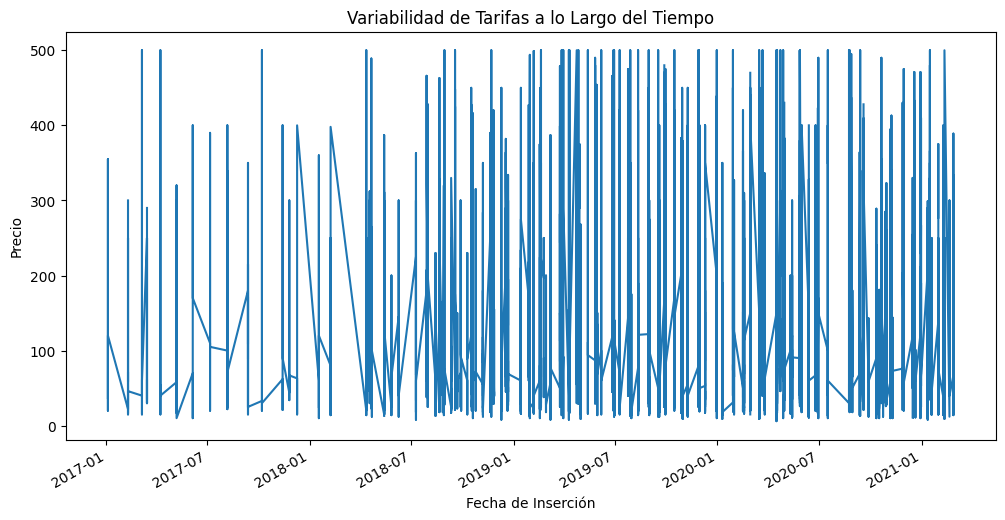

In [ ]:
# Visualización del precio a lo largo del tiempo
plt.figure(figsize=(12, 6))
df_alojamiento.set_index('insert_date')['price'].plot()
plt.title('Variabilidad de Tarifas a lo Largo del Tiempo')
plt.xlabel('Fecha de Inserción')
plt.ylabel('Precio')
plt.show()

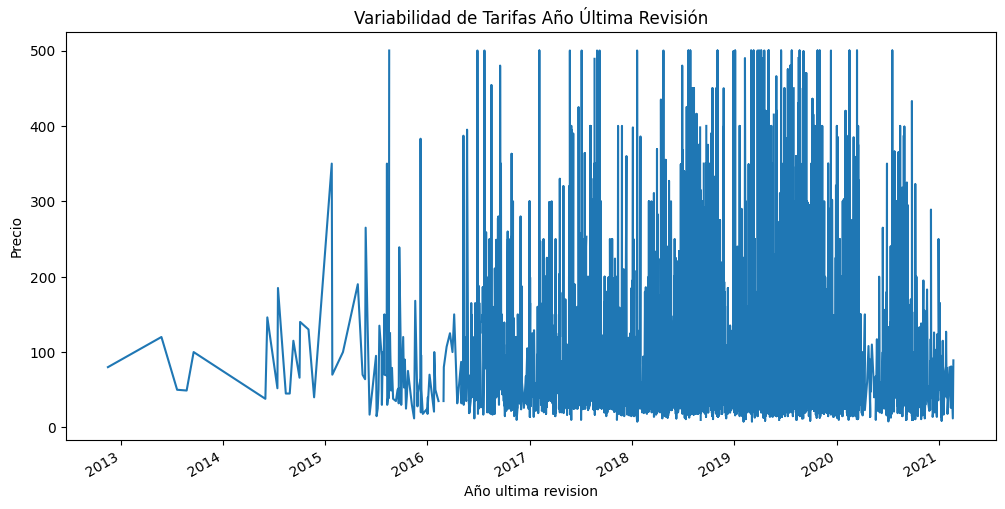

In [ ]:
# Visualización del precio a lo largo del tiempo
plt.figure(figsize=(12, 6))
df_alojamiento.set_index('last_review_date')['price'].plot()
plt.title('Variabilidad de Tarifas Año Última Revisión')
plt.xlabel('Año ultima revision')
plt.ylabel('Precio')
plt.show()

##	Manejo de Datos Ausentes y Valores Atípicos:

In [ ]:

# Mostrando nans en valores porcentuales

# Calcular el número de valores nulos en cada columna
nulos = df_alojamiento.isnull().sum()

# Calcular el porcentaje de valores nulos en cada columna
porcentaje_nulos = (nulos / len(df_alojamiento)) * 100

# Ordenar el porcentaje de valores nulos de mayor a menor
porcentaje_nulos_ordenado = porcentaje_nulos.sort_values(ascending=False)

# Mostrar el porcentaje de valores nulos
print(porcentaje_nulos_ordenado)

license                        48.56
neighborhood_overview          41.01
neighbourhood_district         39.21
review_scores_value            27.24
review_scores_location         27.24
review_scores_checkin          27.23
review_scores_accuracy         27.18
review_scores_communication    27.14
review_scores_cleanliness      27.12
review_scores_rating           27.09
last_review_date               26.05
first_review_date              26.04
reviews_per_month              26.04
has_availability                5.50
price                           2.54
description                     1.38
bathrooms                       0.74
bedrooms                        0.70
beds                            0.45
name                            0.08
city                            0.05
maximum_nights                  0.01
amenities_list                  0.01
room_type                       0.01
availability_90                 0.01
availability_30                 0.01
is_instant_bookable             0.00
c

In [ ]:
# Mostrando nans en valores númericos
# display(df_alojamiento.isna().sum(axis = 0).sort_values(ascending=False))

In [ ]:
f"Cantidad de registros NO nulos sobre columna license: {10000- 4856}"

'Cantidad de registros NO nulos sobre columna license: 5144'

#### Interpretación de los nulos

Para el análisis las columnas


*  license                        4856
*  neighborhood_overview          4101
*  description                     138
*  neighbourhood_district         3921
*  has_availability                550


No las veo esenciales para el analisis por lo que consideraría eliminarlas

En cambio, las siguientes columnas las veo esenciales para el analisis:

*   last_review_date               2605
*   first_review_date              2604
*   reviews_per_month              2604
*   review_scores_value            2724
*   review_scores_location         2724
*   review_scores_checkin          2723
*   review_scores_accuracy         2718
*   review_scores_communication    2714
*   review_scores_cleanliness      2712
*   review_scores_rating           2709
*   price                           254
*   bathrooms                        74
*   bedrooms                         70
*   beds                             45


Por otro lado, estas ni me molestaría en cambiar nada, dejaria los nulos
*   name                              8
*   city                              5
*   maximum_nights                    1
*   amenities_list                    1
*   room_type                         1
*   availability_90                   1
*   availability_30                   1

Por tanto, podria valorar la opción de eliminar las filas nulas, o en cambio, hacer una media o mediana para no perder ninguna informacion. PREGUNTAR

Finalmente, estas tres tengo dudas de si me dan informacion o no


Para continuar, decido elimnar las columnas planteadas y las dudosas, y del reto, hacer una media.

### Limpieza nulos

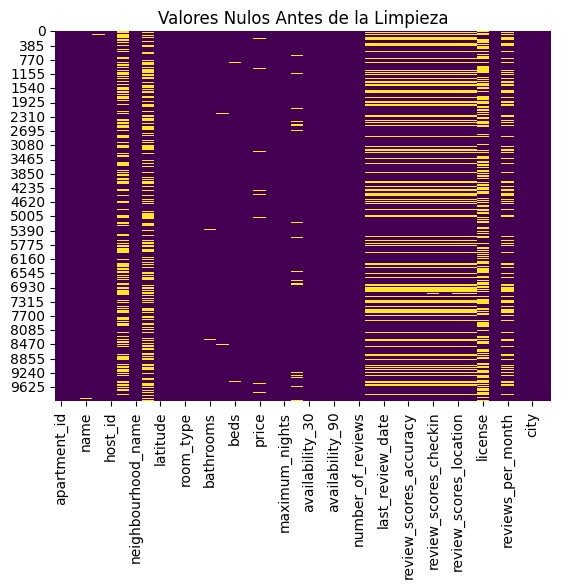

In [ ]:
# Crear un mapa de calor para visualizar los valores nulos antes de la limpieza
sns.heatmap(df_alojamiento.isnull(), cbar=False, cmap='viridis')
plt.title('Valores Nulos Antes de la Limpieza')
plt.show()

In [ ]:

# Lista de columnas que quiero eliminar
columnas_nulas_eliminadas = ['license', 'neighborhood_overview','neighbourhood_district' ,'description','first_review_date','reviews_per_month']

# Eliminar las columnas
df_alojamiento = df_alojamiento.drop(columns=columnas_nulas_eliminadas )


In [ ]:

# Lista de nuevas columnas que quiero eliminar
columnas_nulas_eliminadas_nuevas= ['insert_date']

# Eliminar las columnas
df_alojamiento = df_alojamiento.drop(columns=columnas_nulas_eliminadas_nuevas)


In [ ]:
# Lista de columnas para las que quiero reemplazar los valores nulos con la media
columnas_nulas_media = [ 'review_scores_value', 'review_scores_location', 'review_scores_checkin', 'review_scores_accuracy','last_review_date','review_scores_communication', 'review_scores_cleanliness', 'review_scores_rating', 'has_availability', 'price', 'bathrooms', 'bedrooms', 'beds']

# ojo, estas columnas no son numericas'neighbourhood_district','description'

# Reemplazar los valores nulos con la media en cada columna
for columna in columnas_nulas_media:
    df_alojamiento[columna].fillna(df_alojamiento[columna].mean(), inplace=True)

In [ ]:
# Mostrando nans en valores númericos
display(df_alojamiento.isna().sum(axis = 0).sort_values(ascending=False))

name                           8
city                           5
availability_30                1
amenities_list                 1
maximum_nights                 1
room_type                      1
availability_90                1
number_of_reviews              0
last_review_date               0
review_scores_rating           0
review_scores_accuracy         0
review_scores_communication    0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_location         0
review_scores_value            0
is_instant_bookable            0
country                        0
availability_365               0
apartment_id                   0
availability_60                0
md5                            0
has_availability               0
minimum_nights                 0
price                          0
beds                           0
bedrooms                       0
bathrooms                      0
accommodates                   0
longitude                      0
latitude  

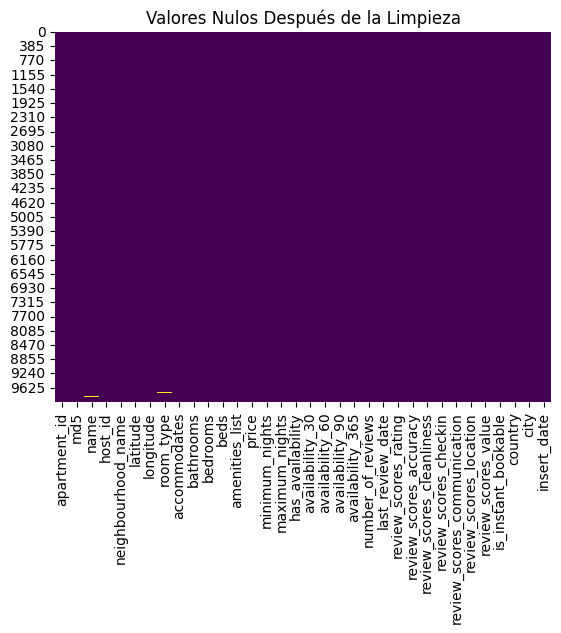

In [ ]:
# Mostrar nans en valores númericos después de la limpieza
sns.heatmap(df_alojamiento.isnull(), cbar=False, cmap='viridis')
plt.title('Valores Nulos Después de la Limpieza')
plt.show()

In [ ]:
# Despliegue de información sobre las columnas y estadísticas generales
print("Información sobre las columnas:")
print(df_alojamiento.info())


Información sobre las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   apartment_id                 10000 non-null  int64         
 1   md5                          10000 non-null  object        
 2   name                         9992 non-null   object        
 3   host_id                      10000 non-null  int64         
 4   neighbourhood_name           10000 non-null  object        
 5   latitude                     10000 non-null  object        
 6   longitude                    10000 non-null  object        
 7   room_type                    9999 non-null   object        
 8   accommodates                 10000 non-null  int64         
 9   bathrooms                    10000 non-null  float64       
 10  bedrooms                     10000 non-null  float64       
 11  beds      

In [ ]:
print("Estadísticas generales del DataFrame:")
display(df_alojamiento.describe())

Estadísticas generales del DataFrame:


,apartment_id,host_id,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,...,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9999.000000,9999.000000,...,9999.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.115440e+07,9.058066e+07,4.272300,1.595910,1.937059,2.982421,101.21109,4.953000,759.622962,13.011701,...,46.108411,187.938800,26.020600,91.929776,9.450151,9.315587,9.623883,9.622152,9.544942,9.137713
std,1.157967e+07,8.695851e+07,2.582716,0.986467,1.365340,4.768256,84.99894,17.728763,498.423889,11.834651,...,33.746582,130.777964,52.347588,7.878529,0.807902,0.859004,0.705129,0.706349,0.654884,0.850220
min,1.196400e+04,1.070400e+04,1.000000,0.000000,0.000000,0.000000,6.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.328672e+07,1.488728e+07,2.000000,1.000000,1.000000,1.000000,45.00000,1.000000,62.000000,0.000000,...,10.000000,66.000000,0.000000,91.000000,9.000000,9.000000,9.623883,9.622152,9.000000,9.000000
50%,2.059847e+07,6.533700e+07,4.000000,1.000000,2.000000,2.000000,76.00000,2.000000,1125.000000,11.000000,...,49.000000,183.000000,5.000000,91.929776,9.450151,9.315587,10.000000,10.000000,9.544942,9.137713
75%,2.995999e+07,1.428246e+08,6.000000,2.000000,3.000000,4.000000,120.00000,4.000000,1125.000000,26.000000,...,80.000000,318.000000,27.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.806155e+07,3.874783e+08,29.000000,13.000000,50.000000,300.000000,500.00000,1125.000000,1125.000000,30.000000,...,90.000000,365.000000,588.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
#ejemplo, para el caso de que quiera eliminar filas
# df_tresh = b.dropna(axis = 0, thresh = 11)
# display(df_tresh.isna().sum(axis = 0))
# df_tresh.shape



thresh con axis = 0: especifica el número mínimo de valores no nulos que una fila debe tener para ser mantenida. Con thresh = 11, se mantenien las filas que tienen al menos 11 valores no nulos. Las filas que se eliminaron son aquellas que no cumplían con este criterio.

thresh con axis = 1: especifica el número mínimo de valores no nulos requeridos para mantener una columna en el dataframe.


In [ ]:
# # Ejemplo thresh con axis = 1, creamos df:
# df1 = pd.df_alojamiento(np.arange(15).reshape(5,3))
# df1

## Creacción nuevas columnas


1- Para las columnas Review, hacer una media de score:rating sobre 100, y las otras sobre 10. Dejar las rating, y las otras hacer una media, y el resultado crear una columna, review global.


2- Avability:

##	Estadísticas Descriptivas:

Algunos ejemplos:

**Media, Mediana, Percentil:** Podría usar estos para entender la distribución de los precios (price), la cantidad de noches mínimas (minimum_nights), la cantidad de noches máximas (maximum_nights), la cantidad de personas que pueden ser acomodadas (accommodates), el número de baños (bathrooms), el número de habitaciones (bedrooms), y el número de camas (beds).

**Desviación Estándar, Desviación Absoluta Media:** Estos podrían ser útiles para entender la variabilidad en los precios (price), la cantidad de noches mínimas (minimum_nights), la cantidad de noches máximas (maximum_nights), la cantidad de personas que pueden ser acomodadas (accommodates), el número de baños (bathrooms), el número de habitaciones (bedrooms), y el número de camas (beds).

**Rango, Estimaciones basadas en Percentiles (IQR):** Estos podrían ser útiles para entender la dispersión de los precios (price), la cantidad de noches mínimas (minimum_nights), la cantidad de noches máximas (maximum_nights), la cantidad de personas que pueden ser acomodadas (accommodates), el número de baños (bathrooms), el número de habitaciones (bedrooms), y el número de camas (beds).

### Media, Mediana, Percentil

In [ ]:
# Media, Mediana, Percentil variable precio
mean_price = df_alojamiento['price'].mean()
median_price = df_alojamiento['price'].median()
percentil_price = df_alojamiento['price'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

print(f'Media: {mean_price}')
print(f'Mediana: {median_price}')
print(f'Diferentes percentiles de la distribución: {percentil_price}') #cuánto mayor es el percentil mayor diferencia de precio hay

In [ ]:
# Media, Mediana, Percentil variable min moches
mean_minimum_nights  = df_alojamiento['minimum_nights'].mean()
median_minimum_nights = df_alojamiento['minimum_nights'].median()
percentil_minimum_nights = df_alojamiento['minimum_nights'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

print(f'Media : {mean_minimum_nights }')
print(f'Mediana : {median_minimum_nights }')
print(f'Diferentes percentiles de la distribución: {percentil_minimum_nights }')

In [ ]:
# Media, Mediana, Percentil variable max noches
mean_maximum_nights = df_alojamiento['maximum_nights'].mean()
median_maximum_nights = df_alojamiento['maximum_nights'].median()
percentil_maximum_nights = df_alojamiento['maximum_nights'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

print(f'Media: {mean_maximum_nights  }')
print(f'Mediana: {median_maximum_nights  }')
print(f'Diferentes percentiles de la distribución: {percentil_maximum_nights }')

In [ ]:
# Media, Mediana, Percentil variable  baños
mean_bathrooms= df_alojamiento['bathrooms'].mean()
median_bathrooms= df_alojamiento['bathrooms'].median()
percentil_bathrooms = df_alojamiento['bathrooms'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

print(f'Media: {mean_bathrooms }')
print(f'Mediana: {median_bathrooms}')
print(f'Diferentes percentiles de la distribución: {percentil_bathrooms}')

In [ ]:
# Media, Mediana, Percentil variable números de personas
mean_accommodates= df_alojamiento['accommodates'].mean()
median_accommodates= df_alojamiento['accommodates'].median()
percentil_accommodates = df_alojamiento['accommodates'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

print(f'Media : {mean_accommodates}')
print(f'Mediana: {median_accommodates}')
print(f'Diferentes percentiles de la distribucións: {percentil_accommodates}')

In [ ]:
# Media, Mediana, Percentil variable bedrooms
mean_bedrooms   = df_alojamiento['bedrooms'].mean()
median_bedrooms   = df_alojamiento['bedrooms'].median()
percentil_bedrooms   = df_alojamiento['bedrooms'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

print(f'Media : {mean_bedrooms   }')
print(f'Mediana : {median_bedrooms   }')
print(f'Diferentes percentiles de la distribución: {percentil_bedrooms  }')

In [ ]:
# Media, Mediana, Percentil variable beds
mean_beds = df_alojamiento['beds'].mean()
median_beds = df_alojamiento['beds'].median()
percentil_beds  = df_alojamiento['beds'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

print(f'Media : {mean_beds }')
print(f'Mediana: {median_beds }')
print(f'Diferentes percentiles de la distribución: {percentil_beds }')

### Desviación Estándar, Desviación Absoluta Media

In [ ]:
#en la línea 19 tenemos un cuadro con información del std.

In [ ]:
#desviación estándar

desv_price=round(df_alojamiento['price'].std(),2)
desv_minimum_nights=round(df_alojamiento['minimum_nights'].std(),2)
desv_maximum_nights=round(df_alojamiento['maximum_nights'].std(),2)
desv_accommodates=round(df_alojamiento['accommodates'].std(),2)
desv_bathrooms=round(df_alojamiento['bathrooms'].std(),2)
desv_bedrooms=round(df_alojamiento['bedrooms'].std(),2)
desv_beds=round(df_alojamiento['beds'].std(),2)

print(f'Media : {desv_price=}')
print(f'Media : {desv_minimum_nights =}')
print(f'Media : {desv_maximum_nights =}')
print(f'Media : {desv_accommodates = }')
print(f'Media : {desv_bathrooms=}')
print(f'Media : {desv_bedrooms=}')
print(f'Media : {desv_beds=}')




In [ ]:

#otra forma de hacerlo con numpy
round(np.std(df_alojamiento['price']),2)

In [ ]:
# Desviación Absoluta Media

# Calcular la MAD para cada variable
mad_price = round(df_alojamiento["price"].mad(), 2)
mad_minimum_nights = round(df_alojamiento["minimum_nights"].mad(), 2)
mad_maximum_nights = round(df_alojamiento["maximum_nights"].mad(), 2)
mad_accommodates = round(df_alojamiento["accommodates"].mad(), 2)
mad_bathrooms = round(df_alojamiento["bathrooms"].mad(), 2)
mad_bedrooms = round(df_alojamiento["bedrooms"].mad(), 2)
mad_beds = round(df_alojamiento["beds"].mad(), 2)

# Imprime los resultados
print(f"Desviación Absoluta Media (MAD) para 'price': {mad_price}")
print(f"Desviación Absoluta Media (MAD) para 'minimum_nights': {mad_minimum_nights}")
print(f"Desviación Absoluta Media (MAD) para 'maximum_nights': {mad_maximum_nights}")
print(f"Desviación Absoluta Media (MAD) para 'accommodates': {mad_accommodates}")
print(f"Desviación Absoluta Media (MAD) para 'bathrooms': {mad_bathrooms}")
print(f"Desviación Absoluta Media (MAD) para 'bedrooms': {mad_bedrooms}")
print(f"Desviación Absoluta Media (MAD) para 'beds': {mad_beds}")


Desviación Absoluta Media (MAD) para 'price': 59.39
Desviación Absoluta Media (MAD) para 'minimum_nights': 4.76
Desviación Absoluta Media (MAD) para 'maximum_nights': 470.0
Desviación Absoluta Media (MAD) para 'accommodates': 1.99
Desviación Absoluta Media (MAD) para 'bathrooms': 0.72
Desviación Absoluta Media (MAD) para 'bedrooms': 0.98
Desviación Absoluta Media (MAD) para 'beds': 1.72


<ipython-input-112-e0f50cbcb51f>:4: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad_price = round(df_alojamiento["price"].mad(), 2)
<ipython-input-112-e0f50cbcb51f>:5: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad_minimum_nights = round(df_alojamiento["minimum_nights"].mad(), 2)
<ipython-input-112-e0f50cbcb51f>:6: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad_maximum_nights = round(df_alojamiento["maximum_nights"].mad(), 2)
<ipython-input-112-e0f50cbcb51f>:7: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad_accommodates = r

### Outliers: Rango, Estimaciones basadas en Percentiles (IQR)

In [ ]:
#rango
# Calcular el rango para cada variable
rango_price = df_alojamiento["price"].max() - df_alojamiento["price"].min()
rango_minimum_nights = df_alojamiento["minimum_nights"].max() - df_alojamiento["minimum_nights"].min()
rango_maximum_nights = df_alojamiento["maximum_nights"].max() - df_alojamiento["maximum_nights"].min()
rango_accommodates = df_alojamiento["accommodates"].max() - df_alojamiento["accommodates"].min()
rango_bathrooms = df_alojamiento["bathrooms"].max() - df_alojamiento["bathrooms"].min()
rango_bedrooms = df_alojamiento["bedrooms"].max() - df_alojamiento["bedrooms"].min()
rango_beds = df_alojamiento["beds"].max() - df_alojamiento["beds"].min()

# Imprime los resultados
print(f"Rango para 'price': {rango_price}")
print(f"Rango para 'minimum_nights': {rango_minimum_nights}")
print(f"Rango para 'maximum_nights': {rango_maximum_nights}")
print(f"Rango para 'accommodates': {rango_accommodates}")
print(f"Rango para 'bathrooms': {rango_bathrooms}")
print(f"Rango para 'bedrooms': {rango_bedrooms}")
print(f"Rango para 'beds': {rango_beds}")


Rango para 'price': 494.0
Rango para 'minimum_nights': 1124
Rango para 'maximum_nights': 1125.0
Rango para 'accommodates': 28
Rango para 'bathrooms': 13.0
Rango para 'bedrooms': 50.0
Rango para 'beds': 300.0


In [ ]:
#Estimaciones basadas en Percentiles (IQR),
# Lista de variables para las que calcular el IQR , aplicando un for para no calcular cada uno de ellos
variables = ["price", "minimum_nights", "maximum_nights", "accommodates", "bathrooms", "bedrooms", "beds"]

for var in variables:
    IQR = df_alojamiento[var].quantile(0.75) - df_alojamiento[var].quantile(0.25)
    lower_bound = df_alojamiento[var].median() - 1.5*IQR
    upper_bound = df_alojamiento[var].median() + 1.5*IQR
    print(f"IQR para '{var}': {IQR}")
    print(f"Límites para '{var}': [{lower_bound}, {upper_bound}]")

IQR para 'price': 75.0
Límites para 'price': [-36.5, 188.5]
IQR para 'minimum_nights': 3.0
Límites para 'minimum_nights': [-2.5, 6.5]
IQR para 'maximum_nights': 1063.0
Límites para 'maximum_nights': [-469.5, 2719.5]
IQR para 'accommodates': 4.0
Límites para 'accommodates': [-2.0, 10.0]
IQR para 'bathrooms': 1.0
Límites para 'bathrooms': [-0.5, 2.5]
IQR para 'bedrooms': 2.0
Límites para 'bedrooms': [-1.0, 5.0]
IQR para 'beds': 3.0
Límites para 'beds': [-2.5, 6.5]


In [ ]:
## Outliers

### Interpretación Estadistica y Visualizacion Outliers





### Variable 'price':

    Media: 101.21
    Mediana: 76.0
    Desviación Estándar: 85.0 (si hay valores atípicos en tus datos, la desviación estándar puede verse fuertemente afectada)
    Desviación Absoluta Media (MAD): 59.39  (es menos sensible a valores extremos (outliers))
    Rango: 494.0
    IQR: 75.0 [-36.5, 188.5] (es la diferencia entre Q1 y Q3, siendo el IQR el Q2)

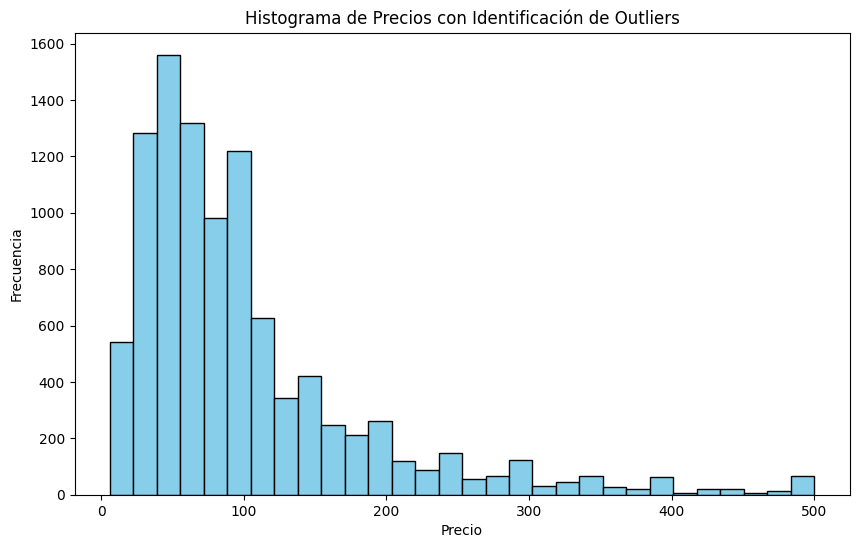

In [ ]:
import matplotlib.pyplot as plt

# Histograma de 'price'
plt.figure(figsize=(10, 6))
plt.hist(df_alojamiento['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de Precios con Identificación de Outliers')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

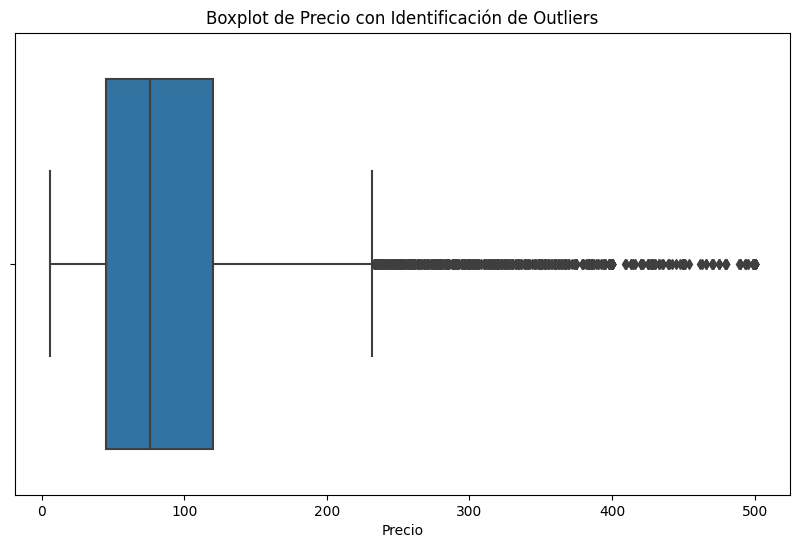

In [ ]:
# Boxplot para 'price' con identificación de outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_alojamiento['price'])
plt.title('Boxplot de Precio con Identificación de Outliers')
plt.xlabel('Precio')
plt.show()

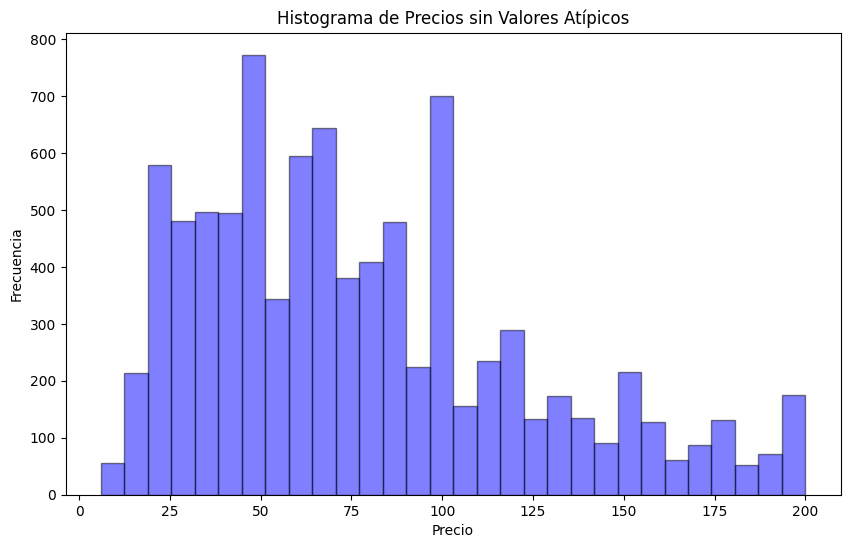

In [ ]:
# Histograma de 'price' sin valores atípicos
df_alojamiento_sin_outliers_precio = df_alojamiento.query('price <= 200')

plt.figure(figsize=(10, 6))
plt.hist(df_alojamiento_sin_outliers_precio['price'], bins=30, alpha=0.5, color='blue', edgecolor='black', label='Price')
plt.title('Histograma de Precios sin Valores Atípicos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

### Conclusión var precios:


    - La media sugiere una distribución sesgada (cola larga hacia la derecha) hacia la derecha.Esto se debe a que la media es mayor que la mediana (76), lo que **indica que hay una mayor proporción de apartamentos con precios más altos que con precios más bajos. **
    - La desviación estándar es alta (85.0), indicando una variabilidad significativa en los precios.
    - La desviación absoluta media (MAD) de 59.39 sugiere que los precios pueden variar considerablemente respecto a la media.
    - El rango de precios es amplio (494.0), lo que indica una gran variabilidad en los datos.
    - El IQR (rango intercuartílico) es 75.0, indicando la dispersión de los datos centrales.
    -El analisis histograma sin valores atipicos, muestra que la mayoría de los alojamientos en España tienen un precio razonable. Sin embargo, hay algunos alojamientos con precios muy elevados, que podrían ser el resultado de factores como la ubicación, la calidad o la disponibilidad.


### Variable Noches:
 Variable 'minimum_nights':

    Media: 4.95
    Mediana: 2.0
    Desviación Estándar: 17.73
    Desviación Absoluta Media (MAD): 4.76
    Rango: 1124
    IQR: 3.0  [-2.5, 6.5]

Variable 'maximum_nights':

    Media: 759.62
    Mediana: 1125.0
    Desviación Estándar: 498.42
    Desviación Absoluta Media (MAD): 470.0
    Rango: 1125.0
    IQR: 1063.0  [-469.5, 2719.5]


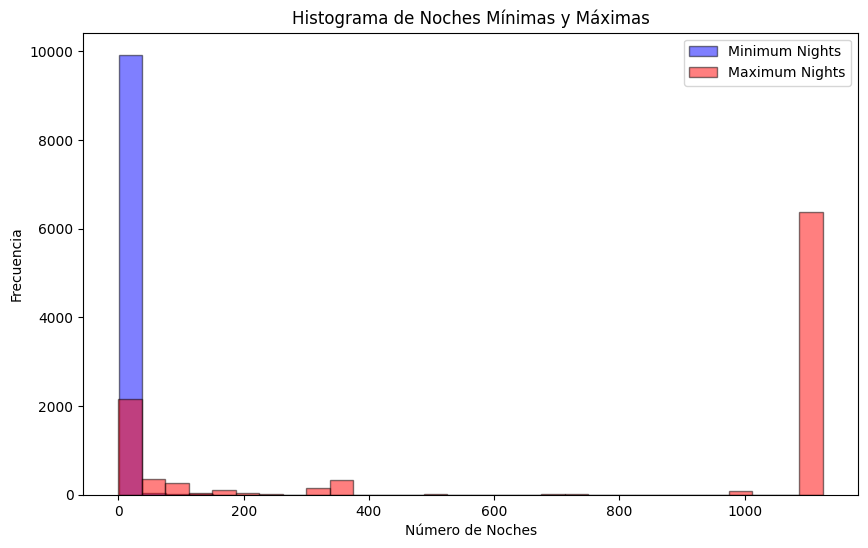

In [ ]:

# Histograma de 'minimum_nights' y 'maximum_nights'
plt.figure(figsize=(10, 6))
plt.hist(df_alojamiento['minimum_nights'], bins=30, alpha=0.5, color='blue', edgecolor='black', label='Minimum Nights')
plt.hist(df_alojamiento['maximum_nights'], bins=30, alpha=0.5, color='red', edgecolor='black', label='Maximum Nights')
plt.title('Histograma de Noches Mínimas y Máximas')
plt.xlabel('Número de Noches')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

#Cuando se superponen dos distribuciones de datos, los colores se mezclan y dan lugar a un nuevo color.

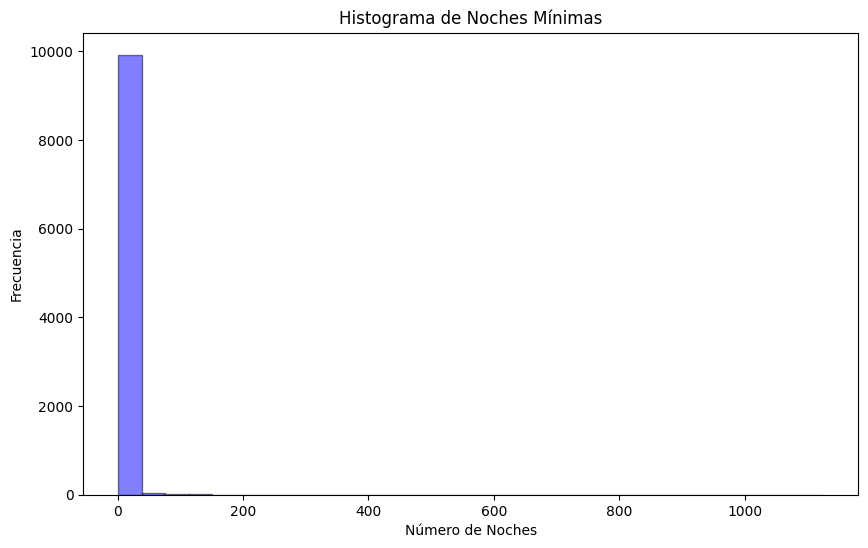

In [ ]:

# Histograma de 'minimum_nights'
plt.figure(figsize=(10, 6))
plt.hist(df_alojamiento['minimum_nights'], bins=30, alpha=0.5, color='blue', edgecolor='black', label='Minimum Nights')
plt.title('Histograma de Noches Mínimas')
plt.xlabel('Número de Noches')
plt.ylabel('Frecuencia')
plt.show()


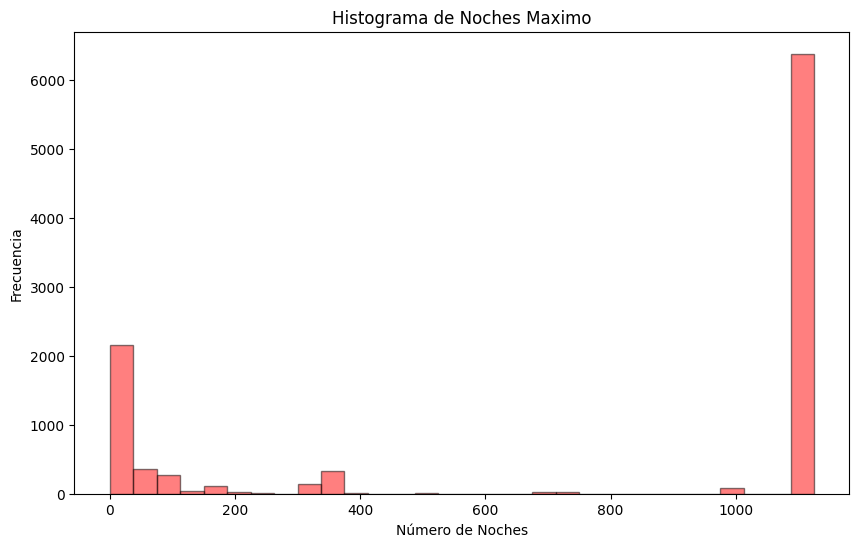

In [ ]:

# Histograma de 'maximum_nights
plt.figure(figsize=(10, 6))
plt.hist(df_alojamiento['maximum_nights'], bins=30, alpha=0.5, color='red', edgecolor='black', label='Maximum Nights')
plt.title('Histograma de Noches Maximo')
plt.xlabel('Número de Noches')
plt.ylabel('Frecuencia')
plt.show()

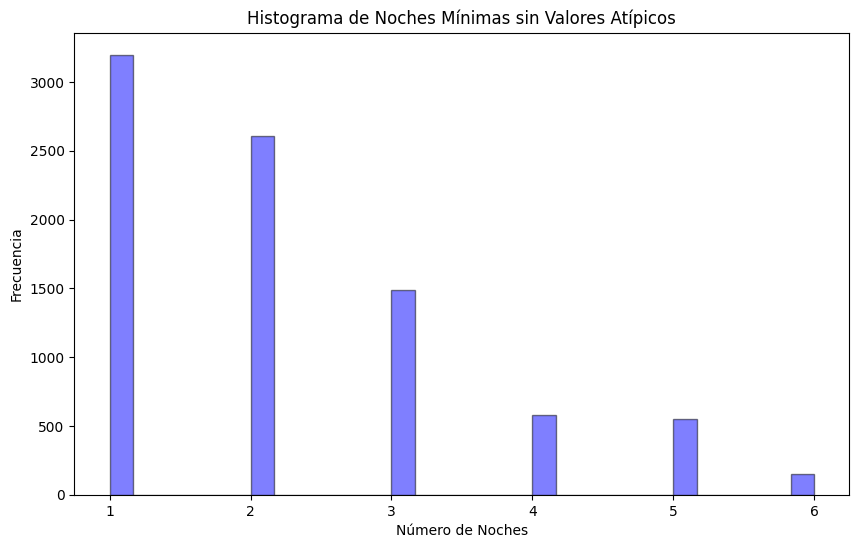

In [ ]:
# Histograma de 'minimum_nights' sin valores atípicos
df_alojamiento_sin_outliers_min= df_alojamiento.query('minimum_nights <= 6')

plt.figure(figsize=(10, 6))
plt.hist(df_alojamiento_sin_outliers_min['minimum_nights'], bins=30, alpha=0.5, color='blue', edgecolor='black', label='Minimum Nights')
plt.title('Histograma de Noches Mínimas sin Valores Atípicos')
plt.xlabel('Número de Noches')
plt.ylabel('Frecuencia')
plt.show()

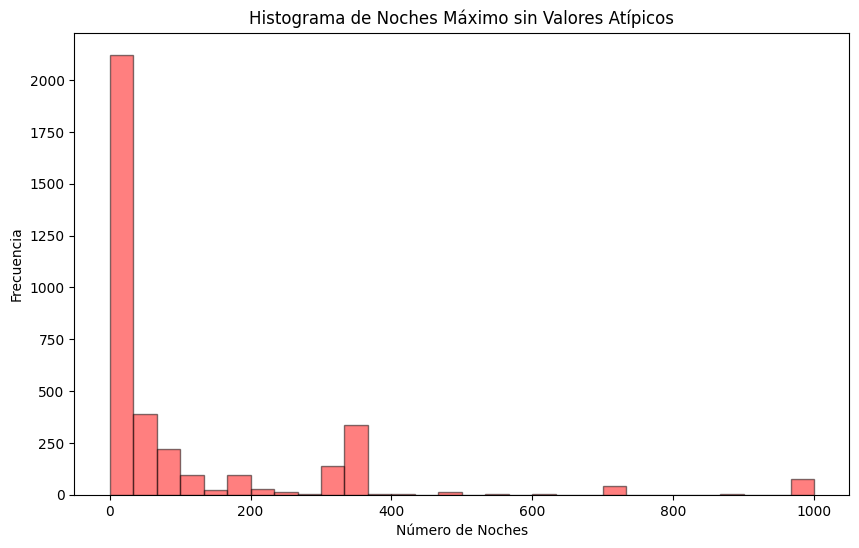

In [ ]:
# Histograma de 'maximum_nights' sin valores atípicos
df_alojamiento_sin_outliers_max = df_alojamiento.query('maximum_nights <= 1000') #en este caso particular uso el IQR: 1063.0 como filtro porque el limite superior es demasiado elevado

plt.figure(figsize=(10, 6))
plt.hist(df_alojamiento_sin_outliers_max['maximum_nights'], bins=30, alpha=0.5, color='red', edgecolor='black', label='Maximum Nights')
plt.title('Histograma de Noches Máximo sin Valores Atípicos')
plt.xlabel('Número de Noches')
plt.ylabel('Frecuencia')
plt.show()

### Conclusión var noches:


Variable 'minimum_nights':
   
    La media (4.95) es mayor que la mediana (2.0), indicando una posible asimetría derecha.
    La mediana indica que el 50% de las estancias son de 2 noches
    La desviación estándar es relativamente alta (17.73), señalando una variabilidad significativa en las noches mínimas.
    El rango (1124) y el IQR (3.0) indican una amplia dispersión de datos, especialmente en los valores atípicos..
    Analisis hist sin outliers:
      El histograma muestra que la mayoría de los alojamientos en España permiten a los huéspedes reservar un número de noches razonable.
      Hay algunos alojamientos que permiten reservar un número menor de noches, que podrían ser el resultado de factores como la ubicación, la calidad o la disponibilidad.

Variable 'maximum_nights':

    La mediana (1125.0) es igual a la media, sugiriendo una distribución simétrica.
    La desviación estándar (498.42) y la desviación absoluta media (470.0) son altas, indicando alta variabilidad.
    El rango (1125.0) y el IQR (1063.0) indican que hay una amplia dispersión en los datos.
    Analisis hist sin outliers:
      La mayoría de los alojamientos en España permiten a los huéspedes reservar un número de noches razonable.
      Hay un pequeño número de alojamientos que permiten reservar un número mayor de noches, por razones que podrían ser la ubicación, la calidad o la disponibilidad.




In [ ]:
max_nights = df_alojamiento['maximum_nights'].max()
print(max_nights)

min_nights = df_alojamiento['minimum_nights'].min()
print(min_nights)

1125.0
1


### Variable 'accommodates':


    Media: 4.27
    Mediana: 4.0
    Desviación Estándar: 2.58
    Desviación Absoluta Media (MAD): 1.99
    Rango: 28
    IQR: 4.0 Límites para 'accommodates': [-2.0, 10.

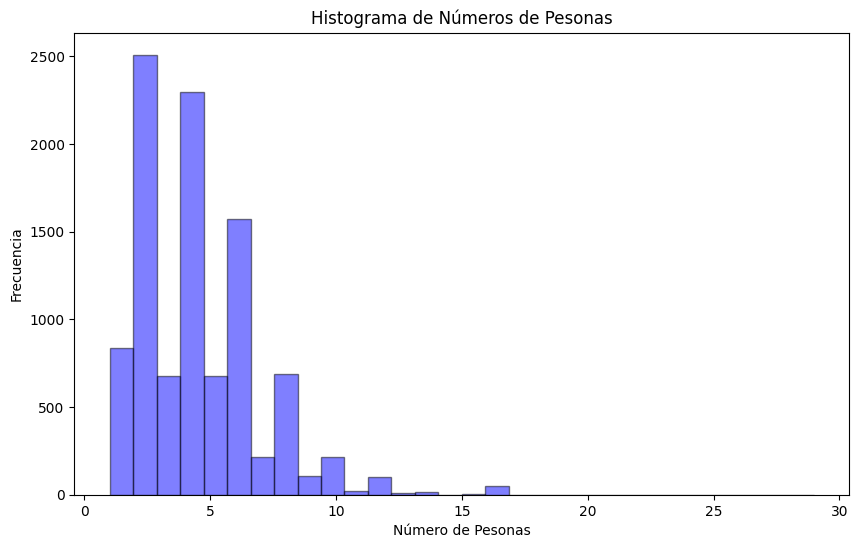

In [ ]:

# Histograma de 'accomodates'
plt.figure(figsize=(10, 6))
plt.hist(df_alojamiento['accommodates'], bins=30, alpha=0.5, color='blue', edgecolor='black', label='accommodates')
plt.title('Histograma de Números de Pesonas')
plt.xlabel('Número de Pesonas')
plt.ylabel('Frecuencia')
plt.show()

#Cuando se superponen dos distribuciones de datos, los colores se mezclan y dan lugar a un nuevo color.

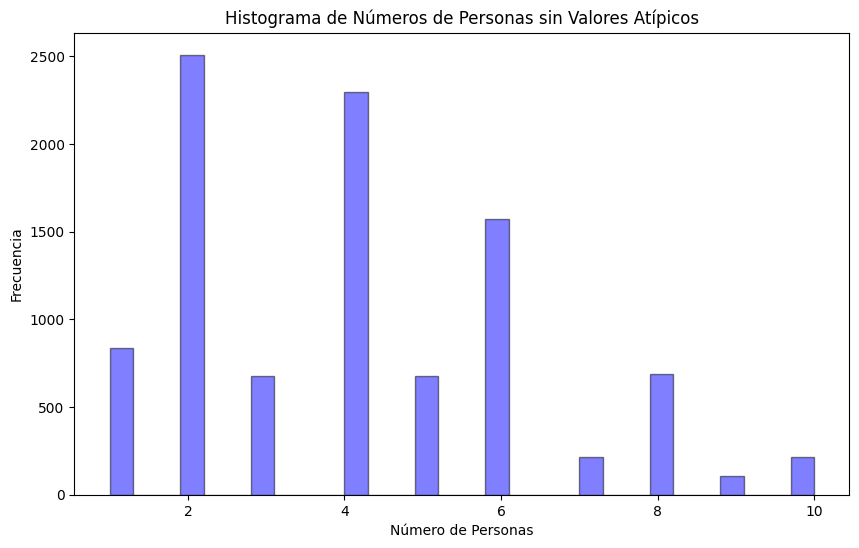

In [ ]:
# Filtrar DataFrame para 'accommodates' sin outliers
df_accommodates_no_outliers = df_alojamiento.query('accommodates <= 10') #Límite superior del IQR

# Histograma de 'accommodates' sin outliers
plt.figure(figsize=(10, 6))
plt.hist(df_accommodates_no_outliers['accommodates'], bins=30, alpha=0.5, color='blue', edgecolor='black', label='accommodates')
plt.title('Histograma de Números de Personas sin Valores Atípicos')
plt.xlabel('Número de Personas')
plt.ylabel('Frecuencia')
plt.show()

### Conclusión var accomodates:

    La media y la mediana son cercanas (4.27 y 4.0 respectivamente), sugiriendo una distribución más simétrica.
    La desviación estándar (2.58) y la desviación absoluta media (1.99) son relativamente bajas en comparación con otras variables.
    El rango (28) y el IQR (4.0) indican cierta variabilidad, pero no tan pronunciada.
    Analisis hist sin valores atipicos
    el histograma muestra, por ejemplo, que la distribución del número de personas que pueden alojarse es similar a la distribución del número máximo de noches. Ambas distribuciones son simétricas, con una cola corta hacia la derecha.
    Esto indica que la mayoría de los alojamientos en España tienen un número de personas que pueden alojarse y un número máximo de noches que permiten reservar razonables.
    Hay algunos alojamientos que tienen un número mayor o menor de personas que pueden alojarse o un número mayor de noches que permiten reservar, por razones que podrían ser la ubicación, la calidad o la disponibilidad.

### Otras variables

Variable 'bathrooms':

    Media: 1.60
    Mediana: 1.0
    Desviación Estándar: 0.99
    Desviación Absoluta Media (MAD): 0.72
    Rango: 13.0
    IQR: 1.0 Límites para 'bathrooms': [-0.5, 2.5]

Variable 'bedrooms':

    Media: 1.94
    Mediana: 2.0
    Desviación Estándar: 1.37
    Desviación Absoluta Media (MAD): 0.98
    Rango: 50.0
    IQR: 2.0 Límites para 'bedrooms': [-1.0, 5.0]

Variable 'beds':

    Media: 2.98
    Mediana: 2.0
    Desviación Estándar: 4.77
    Desviación Absoluta Media (MAD): 1.72
    Rango: 300.0
    IQR: 3.0 IQR Límites para 'beds': [-2.5, 6.5]

In [ ]:
plt.figure(figsize=(10, 6))

# Histograma de 'bathrooms'
plt.hist(df_alojamiento['bathrooms'], bins=30, alpha=0.5, color='blue', edgecolor='black', label='Baños')

# Histograma de 'bedrooms'
plt.hist(df_alojamiento['bedrooms'], bins=30, alpha=0.5, color='green', edgecolor='black', label='Habitaciones')

# Histograma de 'beds'
plt.hist(df_alojamiento['beds'], bins=30, alpha=0.5, color='red', edgecolor='black', label='Camas')

plt.title('Histograma de Baños, Habitaciones y Camas')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


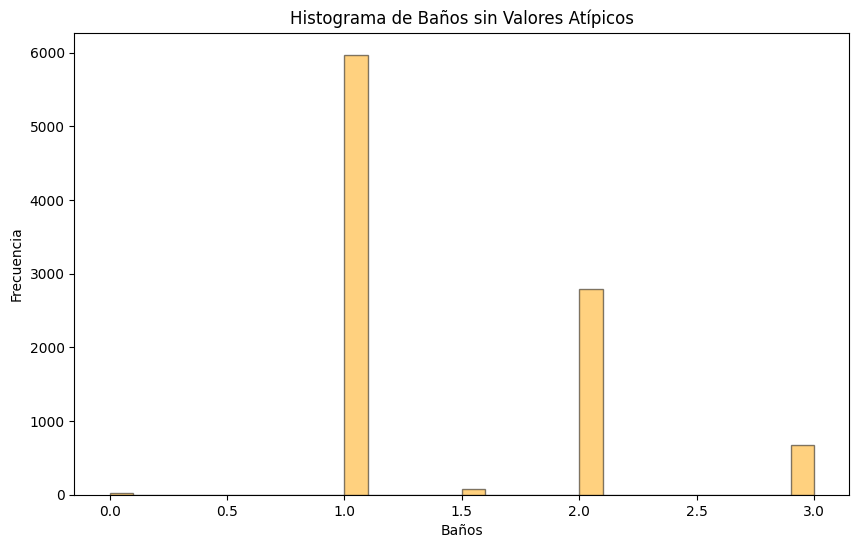

In [ ]:
# Histograma de 'bathrooms' sin valores atípicos
df_alojamiento_sin_outliers_bath = df_alojamiento.query('bathrooms <= 3')

plt.figure(figsize=(10, 6))

# Histograma de 'bathrooms'
plt.hist(df_alojamiento_sin_outliers_bath ['bathrooms'], bins=30, alpha=0.5, color='orange', edgecolor='black', label='Baños')

plt.title('Histograma de Baños sin Valores Atípicos')
plt.xlabel('Baños')
plt.ylabel('Frecuencia')
plt.show()

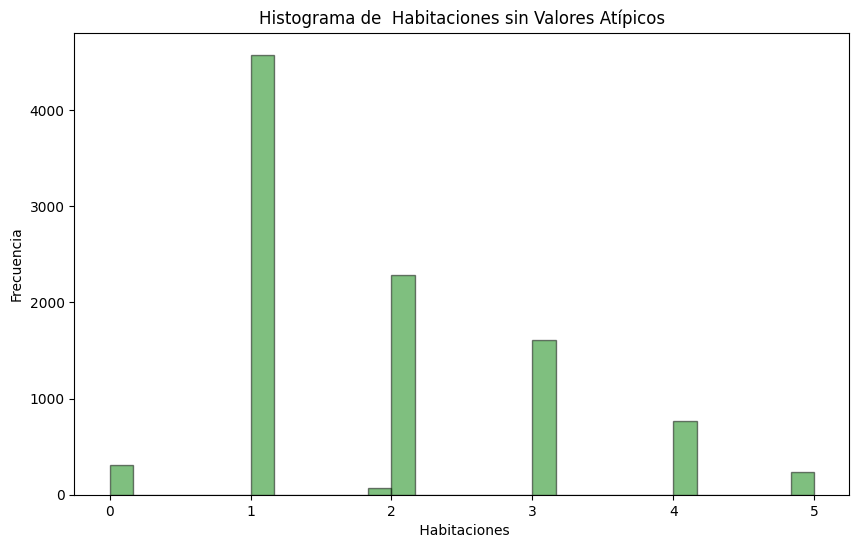

In [ ]:
# # Histograma de  'bedrooms' sin valores atípicos
df_alojamiento_sin_outliers_bedr = df_alojamiento.query('bedrooms <= 7')

plt.figure(figsize=(10, 6))

# Histograma de 'bedrooms'
plt.hist(df_alojamiento_sin_outliers_bedr['bedrooms'], bins=30, alpha=0.5, color='green', edgecolor='black', label='Habitaciones')

plt.title('Histograma de  Habitaciones sin Valores Atípicos')
plt.xlabel(' Habitaciones')
plt.ylabel('Frecuencia')

plt.show()

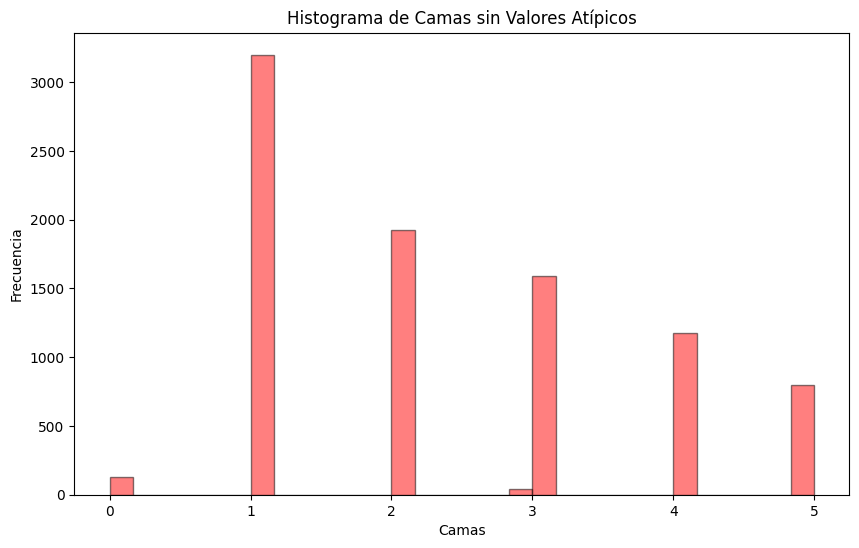

In [ ]:
# # Histograma de 'beds' sin valores atípicos
df_alojamiento_sin_outliers_beds = df_alojamiento.query('beds <= 5')

plt.figure(figsize=(10, 6))


# Histograma de 'beds'
plt.hist(df_alojamiento_sin_outliers_beds['beds'], bins=30, alpha=0.5, color='red', edgecolor='black', label='Camas')

plt.title('Histograma de Camas sin Valores Atípicos')
plt.xlabel('Camas')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Usar el método .loc para conocer la información dónde las beds se igual 300
df_alojamiento.loc[df_alojamiento['beds'] == 300]

#si parece que hay dos villas

,apartment_id,md5,name,description,host_id,neighborhood_overview,neighbourhood_name,neighbourhood_district,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_instant_bookable,reviews_per_month,country,city,insert_date
36,21616423,9736bc26d2a0da97317f04b9dc4b182c,Villa de lujo con acceso privado a la playa.,Bonita Villa para 9 personas en una tranquila ...,157248245,La villa está ubicada en una magnifica zona re...,Ciutadella de Menorca,NaN,4.000.068,380.093,...,9.0,9.0,9.0,9.0,NaN,True,0.63,spain,menorca,2020-04-30
9325,37960115,477d7ea6daafb1c19012803fcd83401b,HOME FAMILY,"És una casa muy bonita y acogedora, con todas ...",287790795,"ÉS UN BARRIO MUY TRANQUILO, NO HAY RUIDOS.",Tossa de Mar,NaN,4.172.537,293.512,...,10.0,10.0,8.0,8.0,HUTG-036175,True,1.00,spain,girona,2019-09-30


### Conclusión var otras variables:

Variable Bathroom

    La media (1.60) y la mediana (1.0) sugieren una distribución sesgada hacia la derecha.
    La desviación estándar (0.99) es moderada, indicando cierta variabilidad en el número de baños.
    El rango (13.0) y el IQR (1.0) indican variabilidad, pero no tan amplia.
    Analisis sin valores atipicos:
      El histograma muestra que la mayoría de los alojamientos en España tienen un baño, lo que es un requisito básico para la mayoría de los huéspedes. Sin embargo, hay algunos alojamientos que tienen dos o más baños, lo que podría ser el resultado de factores como el tamaño del alojamiento, la ubicación o el tipo de alojamiento.



Variable Bedsroom

    La media (1.94) y la mediana (2.0) sugieren una distribución casi simétrica.
    La desviación estándar (1.37) es moderada, indicando cierta variabilidad en el número de habitaciones.
    El rango (50.0) y el IQR (2.0) indican cierta variabilidad, especialmente con algunos valores atípicos.
    Analisis sin valores atipicos:
      La mayoría de los alojamientos en España tienen una o dos habitaciones, lo que es un requisito básico para la mayoría de los huéspedes.
      Hay un pequeño número de alojamientos que tienen tres o más habitaciones, lo que podría ser el resultado de factores como el tamaño del alojamiento, la ubicación o el tipo de alojamiento.


Variable Beds

    La media (2.98) y la mediana (2.0) sugieren una distribución sesgada hacia la derecha.
    La desviación estándar (4.77) y la desviación absoluta media (1.72) son relativamente altas.
    El rango (300.0) y el IQR (3.0) indican una amplia dispersión de datos, especialmente en los valores atípicos.
    Analisis sin valores atipicos:
      La mayoría de los alojamientos en España tienen una o dos camas, lo que es un requisito básico para la mayoría de los huéspedes.
      Hay un pequeño número de alojamientos que tienen tres o más camas, lo que podría ser el resultado de factores como el tamaño del alojamiento, la ubicación o el tipo de alojamiento.


## Visualización de distribuciones y correlaciones.

### Visualizaciones:

array([[<Axes: title={'center': 'apartment_id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'accommodates'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'maximum_nights'}>,
        <Axes: title={'center': 'availability_30'}>],
       [<Axes: title={'center': 'availability_60'}>,
        <Axes: title={'center': 'availability_90'}>,
        <Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'last_review_date'}>],
       [<Axes: title={'center': 'review_scores_rating'}>,
        <Axes: title={'center': 'review_scores_accuracy'}>,
        <Axes: title={'center': 'review_scores_cleanliness'}>,
        <Axes: title={'center': 'review_scores_checkin'}>,
        

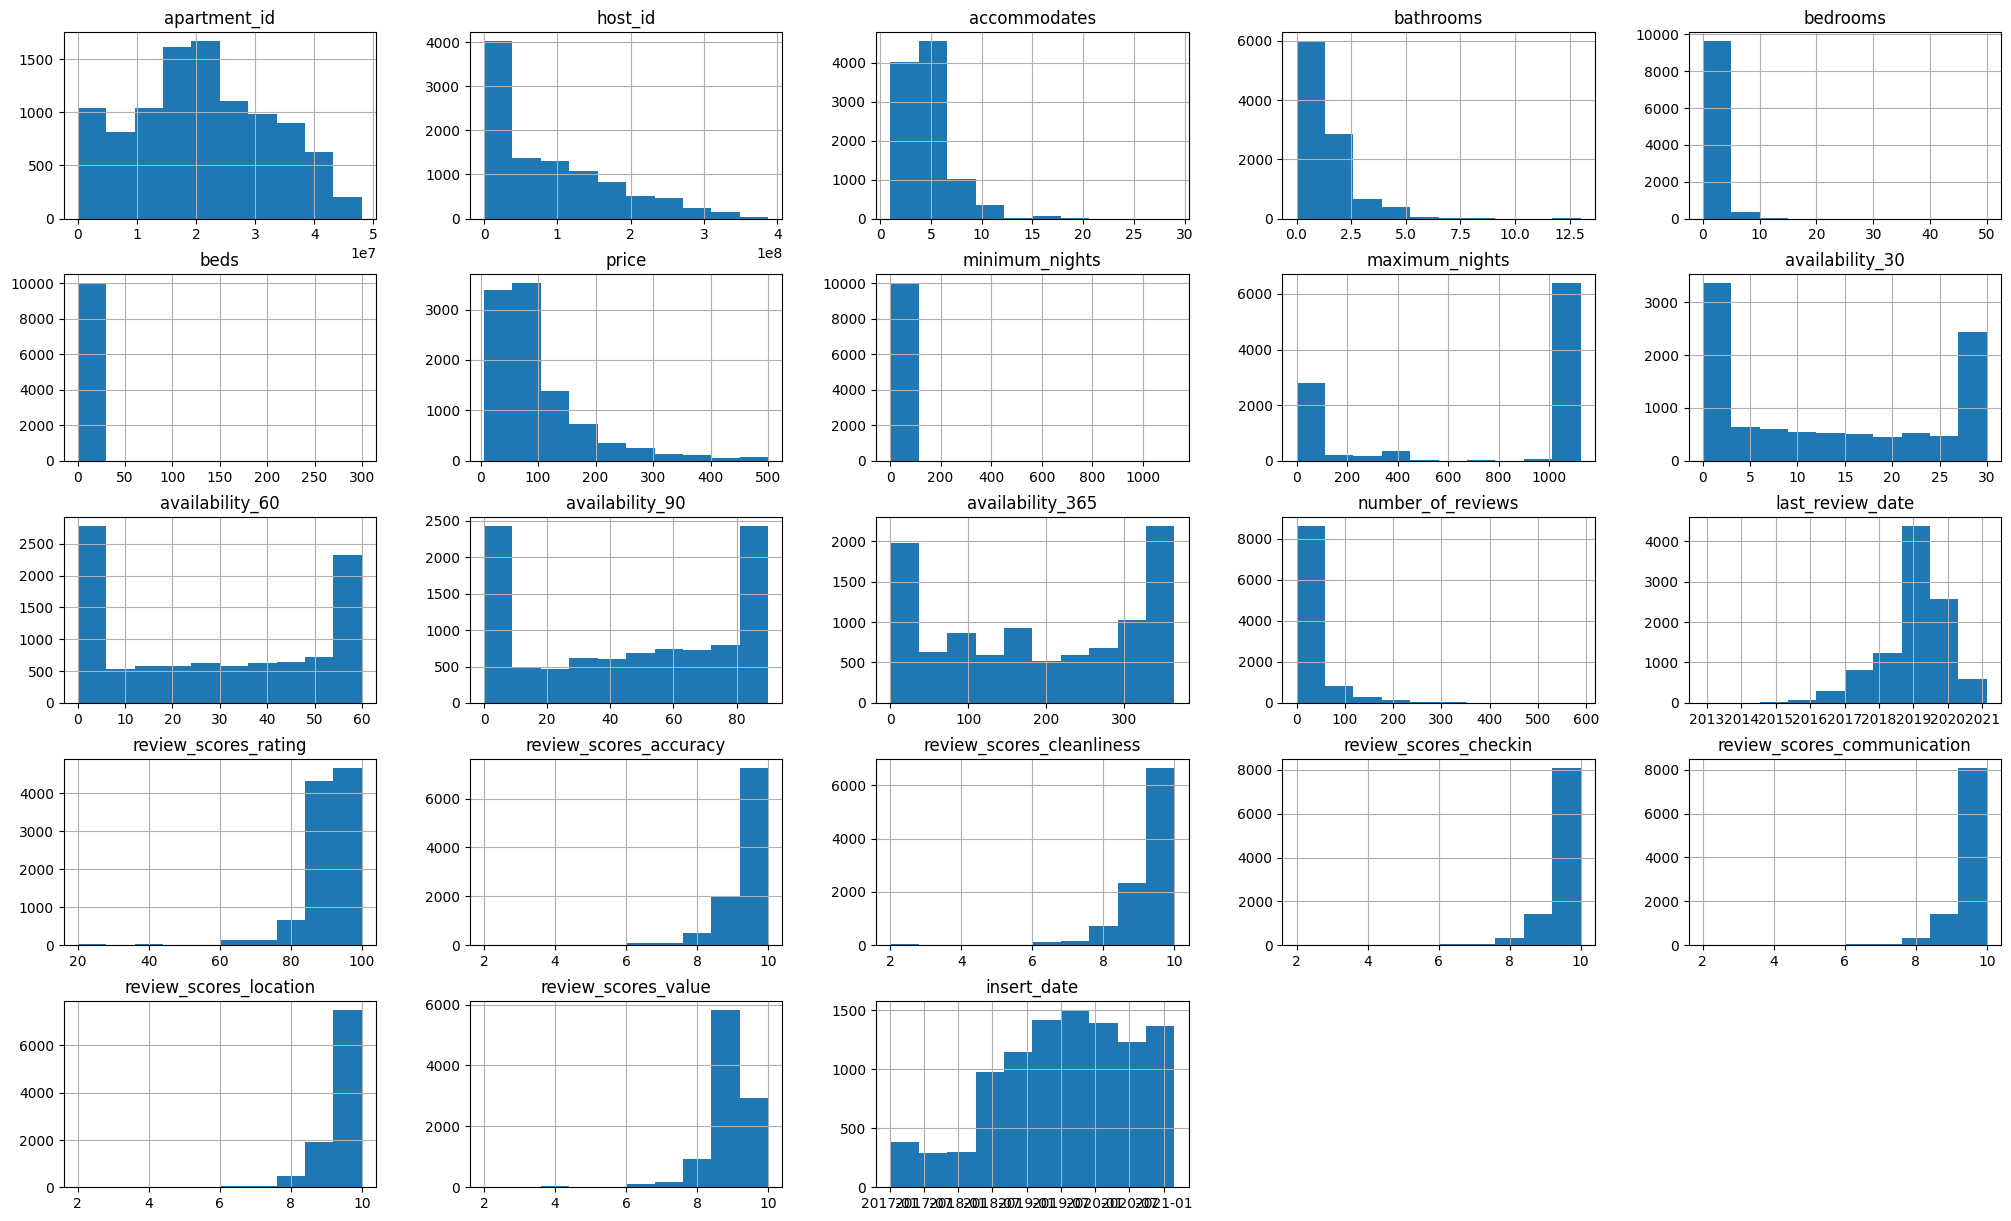

In [ ]:
# (solo float & int)
df_alojamiento.hist(figsize = (25,15))



*   *apartment_id y host_id:* Son identificadores únicos y no proporcionan información significativa sobre las tendencias de los datos.
*   *accommodates, bathrooms, bedrooms:* Indican que la mayoría de los apartamentos pueden alojar a un número pequeño de personas y tienen pocas instalaciones, lo que sugiere que son adecuados para estancias individuales o en pareja.
*   *price:* La mayoría de los apartamentos tienen precios bajos, lo que indica que son asequibles para la mayoría de los usuarios.
* minimum_nights, maximum_nights:* La mayoría de los apartamentos requieren estancias cortas, lo que sugiere que son populares para viajes de corta duración.
*   *availability_30, availability_60:* La mayoría de los datos se agrupan hacia un extremo, indica que la mayoría de los apartamentos tienen esa disponibilidad.
*   *availability_90, availability_365:* La mayoría de los datos se agrupan hacia un extremo, indica que la mayoría de los apartamentos tienen esa disponibilidad.
*   *number_of_reviews*: La mayoría de los apartamentos tienen pocos comentarios, lo que puede sugerir que son nuevos en el mercado o no son muy populares.
*   *review_scores_*…: La mayoría de los apartamentos tienen altas puntuaciones de revisión, lo que indica que los usuarios generalmente están satisfechos con su estancia.



<Axes: >

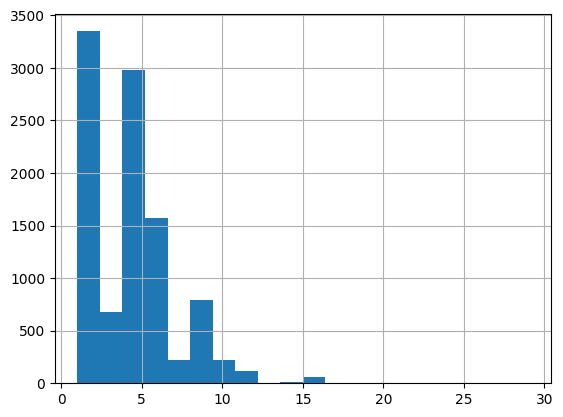

In [ ]:
df_alojamiento["accommodates"].hist(bins=20)

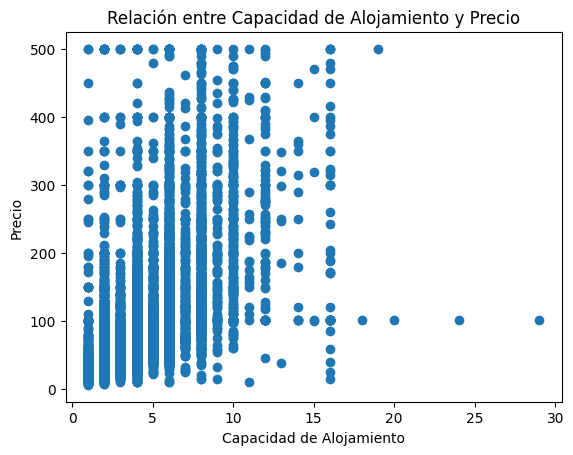

In [ ]:
# Relación entre el tipo de personas  y el precio
	# accommodates vs. price: Exploraremos cómo varía el precio en función de la capacidad de alojamiento.



# Visualización de la relación entre 'accommodates' y 'price' usando un gráfico de dispersión
plt.scatter(df_alojamiento['accommodates'], df_alojamiento['price'])
plt.title('Relación entre Capacidad de Alojamiento y Precio')
plt.xlabel('Capacidad de Alojamiento')
plt.ylabel('Precio')
plt.show()



```
los puntos de dispersión están más juntos en el área donde la capacidad de alojamiento es alta y el precio es alto.

Esto significa que hay una mayor concentración de datos en esta área.

Cuanto más dispersos estén los puntos de dispersión, mayor será la variabilidad de los datos.
```




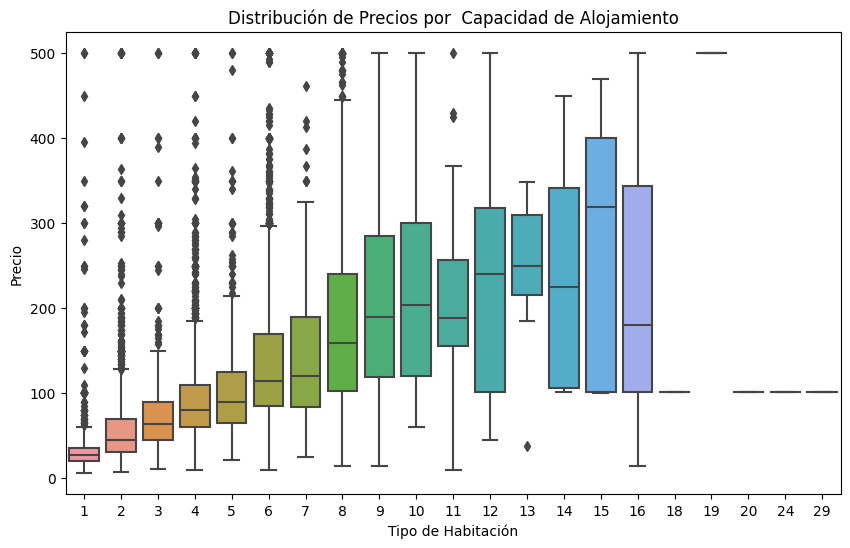

In [ ]:
# Visualización de la relación entre 'accommodates' y 'price' usando un gráfico de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(x='accommodates', y='price', data=df_alojamiento)
plt.title('Distribución de Precios por  Capacidad de Alojamiento')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio')
plt.show()



*   La mediana se muestra como una línea horizontal en el medio de la caja.


*   El primer y tercer cuartil se muestran como líneas verticales que se extienden desde los bordes de la caja.


*   La altura de la caja es el rango intercuartílico, que es la diferencia entre el tercer y el primer cuartil. Este valor mide la dispersión de los datos centrales, es decir, los que están entre el 25% y el 75%.

*   Los valores atípicos se muestran como puntos fuera de la caja.





```
En términos de la relación entre la capacidad de alojamiento y el precio, la distribución de cajas muestra que los alojamientos con mayor capacidad tienen un precio más alto en general.

Esto se puede ver en el hecho de que la caja de los alojamientos con mayor capacidad (10 personas o más) está más alta que la caja de los alojamientos con menor capacidad (1-2 personas).

La distribución de cajas también muestra que hay algunos valores atípicos en los datos.

Estos valores atípicos están fuera de los límites de la distribución de cajas.

Por ejemplo, hay algunos alojamientos con una capacidad relativamente baja que tienen un precio relativamente alto.


La distribución de cajas muestra que la capacidad de alojamiento es un factor importante a tener en cuenta al determinar el precio de un alojamiento.

Sin embargo, es importante tener en cuenta que hay otros factores que también pueden influir en el precio.


```



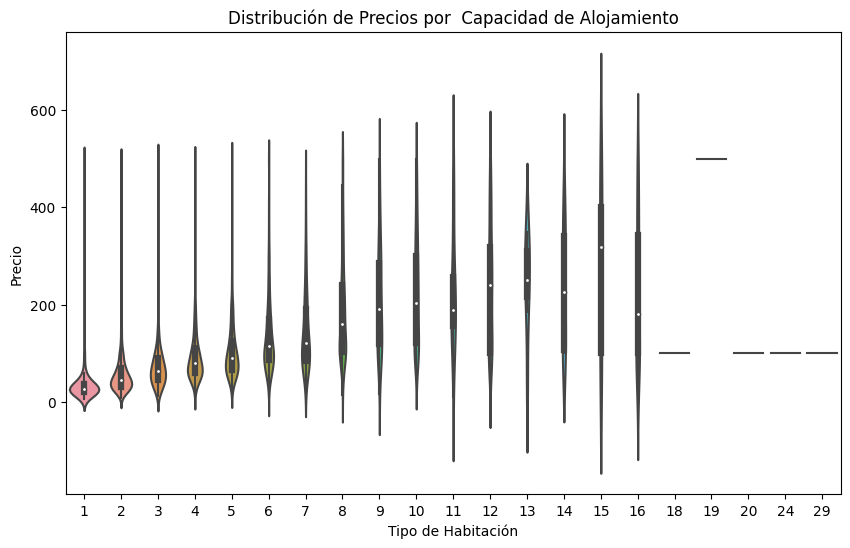

In [ ]:
# sns.violinplot

# Visualización de la relación entre 'accommodates' y 'price' usando un gráfico violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='accommodates', y='price', data=df_alojamiento)
plt.title('Distribución de Precios por  Capacidad de Alojamiento')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio')
plt.show()

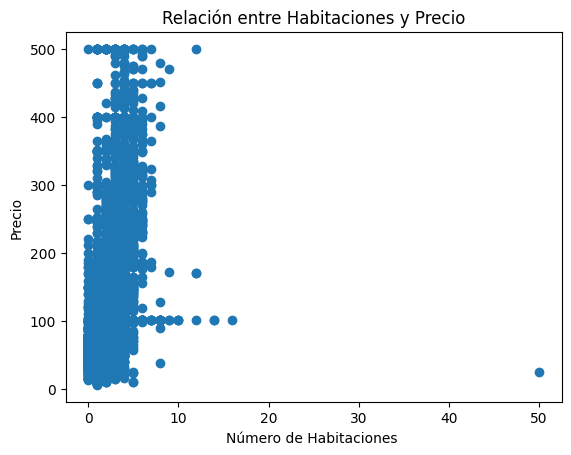

In [ ]:
# bedrooms vs. price: Analizaremos si existe una relación entre el número de habitaciones y el precio.


# Visualización de la relación entre '# bedrooms vs. price:' usando un gráfico de dispersión
plt.scatter(df_alojamiento['bedrooms'], df_alojamiento['price'])
plt.title('Relación entre Habitaciones y Precio')
plt.xlabel('Número de Habitaciones ')
plt.ylabel('Precio')
plt.show()

In [ ]:
df_alojamiento[df_alojamiento["bedrooms"] > 40]

,apartment_id,md5,name,description,host_id,neighborhood_overview,neighbourhood_name,neighbourhood_district,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_instant_bookable,reviews_per_month,country,city,insert_date
147,34523812,b8257f8b868864cd2faf6cbf3492e4c5,NEW RESIDENCE IN MADRID 50 INDIVIDUALS ROOMS,"Full building of 52 rooms, with 10 bathrooms, ...",130100816,"La zona es residencial y tranquila, frente a u...",Pradolongo,Usera,4.038.025,-370.887,...,NaN,NaN,NaN,NaN,NaN,True,NaN,spain,madrid,2019-06-07




```
 Eráfico muestra que, en general, una mayor concentración entre los alojamientos con mayor capacidad y el precio más alto.

 Por tanto, se puede decir que la relación entre ambas es positiva,es decir, ambas variables se mueven en la misma dirección.Es decir, a mayor número de habitaciones, mayor precio.

 Y que la relación es lineal, es decir, aque ambas variables se pueden representar por una línea recta (la mayoría de los puntos de dispersión se encuentran a lo largo de una línea recta que va de la parte inferior izquierda de la gráfica a la parte superior derecha.)

 También se puede notar que hay mucha variabilidad en los precios para un mismo número de habitaciones, lo que indica que hay otros factores que influyen en el precio, como la ubicación, el tamaño, la calidad, etc.

 El gráfico también muestra que hay algunos valores atípicos, es decir, alojamientos que tienen un precio muy alto o muy bajo en comparación con el resto, lo que puede deberse a errores de datos o a características especiales de esos alojamiento

```



,apartment_id,md5,name,description,host_id,neighborhood_overview,neighbourhood_name,neighbourhood_district,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_instant_bookable,reviews_per_month,country,city,insert_date
36,21616423,9736bc26d2a0da97317f04b9dc4b182c,Villa de lujo con acceso privado a la playa.,Bonita Villa para 9 personas en una tranquila ...,157248245,La villa está ubicada en una magnifica zona re...,Ciutadella de Menorca,NaN,4.000.068,380.093,...,9.0,9.0,9.0,9.0,NaN,True,0.63,spain,menorca,2020-04-30
9325,37960115,477d7ea6daafb1c19012803fcd83401b,HOME FAMILY,"És una casa muy bonita y acogedora, con todas ...",287790795,"ÉS UN BARRIO MUY TRANQUILO, NO HAY RUIDOS.",Tossa de Mar,NaN,4.172.537,293.512,...,10.0,10.0,8.0,8.0,HUTG-036175,True,1.00,spain,girona,2019-09-30


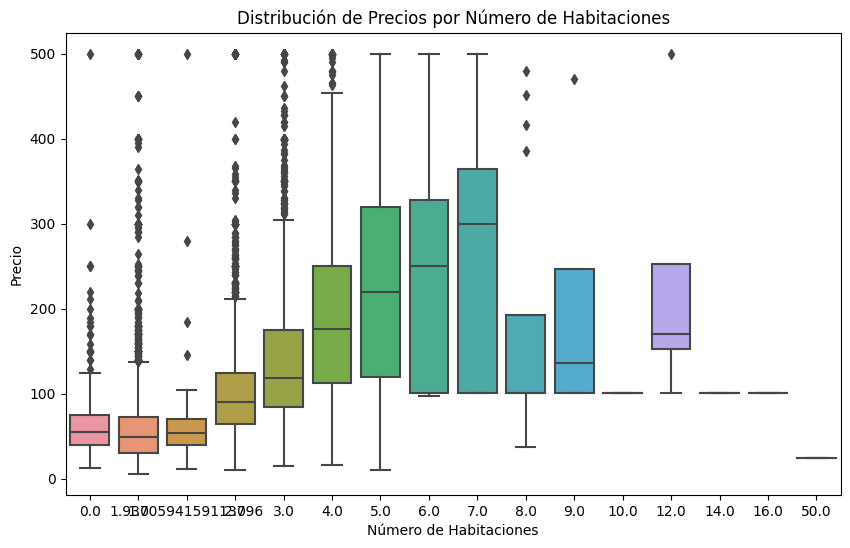

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df_alojamiento)
plt.title('Distribución de Precios por Número de Habitaciones')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio')
plt.show()



```
Se puede observar que la mediana del precio aumenta a medida que aumenta el número de habitaciones, lo que indica una relación positiva entre ambas variables.

Sin embargo, también se puede notar que la variabilidad del precio es alta para cada número de habitaciones, lo que significa que hay una gran dispersión de los datos alrededor de la mediana.

El gráfico también muestra que hay muchos valores atípicos, especialmente para los alojamientos con más de 5 habitaciones, lo que sugiere que hay factores adicionales que afectan al precio, como la ubicación, el tamaño, la calidad, etc.
```



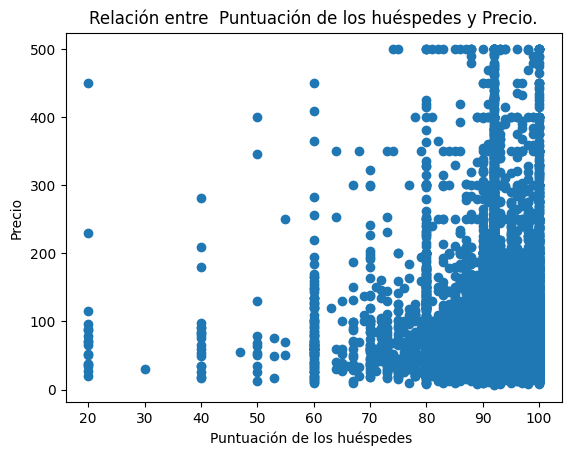

In [ ]:
# review_scores_rating vs. price: Investigaremos la correlación entre la puntuación de los huéspedes y el precio.

# Visualización de la relación entre '# review_scores_rating vs. price:' usando un gráfico de dispersión
plt.scatter(df_alojamiento['review_scores_rating'], df_alojamiento['price'])
plt.title('Relación entre  Puntuación de los huéspedes y Precio.')
plt.xlabel('Puntuación de los huéspedes ')
plt.ylabel('Precio')
plt.show()



```
Se puede observar que hay una correlación positiva débil, es decir, a mayor puntuación de los huéspedes, mayor precio, pero no de forma muy marcada.

Esto significa que la puntuación de los huéspedes no es el único factor que determina el precio, sino que hay otros aspectos que influyen, como la ubicación, el tamaño, la calidad, etc.

El gráfico también muestra que hay algunos valores atípicos, es decir, alojamientos que tienen un precio muy alto o muy bajo en comparación con el resto, lo que puede deberse a errores de datos o a características especiales de esos alojamientos.

```



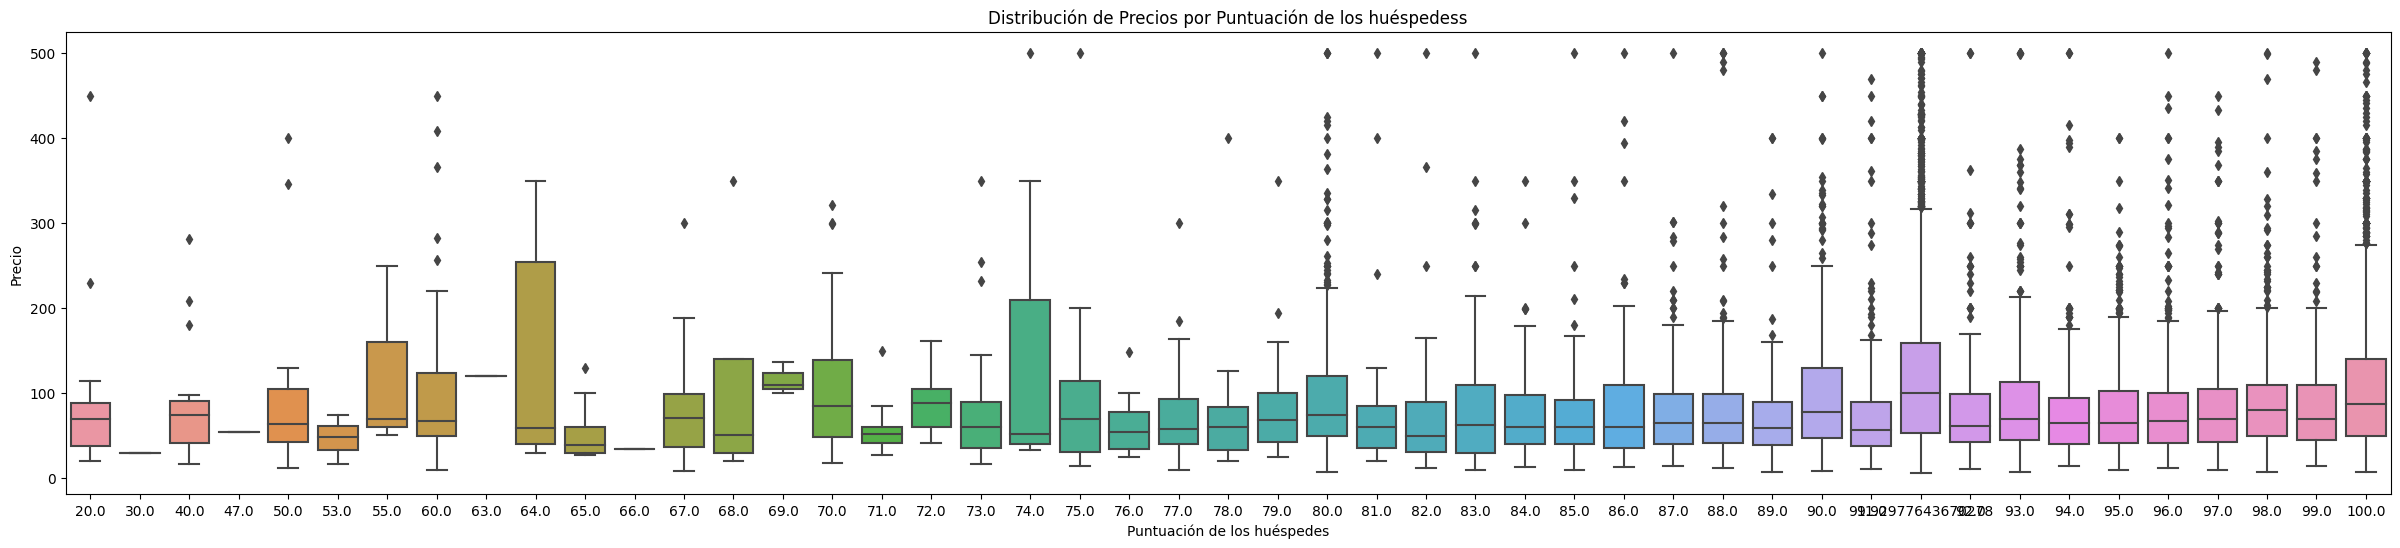

In [ ]:
plt.figure(figsize=(30, 6))
sns.boxplot(x='review_scores_rating', y='price', data=df_alojamiento)
plt.title('Distribución de Precios por Puntuación de los huéspedess')
plt.xlabel('Puntuación de los huéspedes')
plt.ylabel('Precio')
plt.show()

### Correlaciones


In [ ]:
#Haremos un análisis de correlación de estos campos con el de precio, para ver si nuestra hipotesis es correcta

# Crear columnas one-hot para room_type
room_type_dummies = pd.get_dummies(df_alojamiento['room_type'], prefix='room_type')

# Añadir las nuevas columnas a tus datos
df_alojamiento = pd.concat([df_alojamiento, room_type_dummies], axis=1)

##Crear nueva columna amenities_list para contar los elemetnos de la columna, no se puede usar value.counts, existe una funcion lambda x: len(x) cuenta el número de elementos en cada lista.

df_alojamiento['amenities_list_int'] = df_alojamiento['amenities_list'].str.split(',').str.len()  #(divide cada cadena en la columna ‘amenities_list’ en una lista de comodidades (usando la coma como separador), y luego cuenta el número de comodidades en cada lista con str.len(). El resultado se almacena en la nueva columna ‘amenities_list_int’.)

# Crear columnas one-hot para la ciudad
city_dummies = pd.get_dummies(df_alojamiento['city'], prefix='city')

# Añadir las nuevas columnas a tus datos
df_alojamiento = pd.concat([df_alojamiento, city_dummies], axis=1)


# Agrupar en una lista las columnas que me interesan
parametros_precio = ['accommodates', 'bathrooms', 'bedrooms', 'beds','amenities_list_int','city_barcelona','city_girona','city_madrid','city_malaga','city_mallorca','city_menorca','city_sevilla','city_valencia','room_type_Entire home/apt','room_type_Hotel room','room_type_Private room','room_type_Shared room', 'review_scores_rating', 'price']

#nota: 'room_type' al ser un objeto como no puede hacer la correlación no me la cuenta. Podrias crear una columna nueva para y darle un valor númerico a cada tipo para que así me cuente las columnas. Lo mismo me pasa con 'amenities_list','neighbourhood_name', 'neighbourhood_district. Lo hago antes de crear la variable parametro


# Crea un nuevo DataFrame con estas columnas
df_precio= df_alojamiento[parametros_precio]

# Analisis correlación df_precio
df_precio.corr()

,accommodates,bathrooms,bedrooms,beds,amenities_list_int,city_barcelona,city_girona,city_madrid,city_malaga,city_mallorca,city_menorca,city_sevilla,city_valencia,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,review_scores_rating,price
accommodates,1.000000,0.620791,0.798131,0.426141,0.202706,-0.236024,0.229826,-0.194897,-0.017892,0.298509,0.097078,-0.030528,-0.044113,0.573667,-0.048911,-0.563069,-0.052476,0.000453,0.564800
bathrooms,0.620791,1.000000,0.687581,0.303711,0.152391,-0.154533,0.059689,-0.132350,-0.064322,0.348716,0.079137,-0.051071,-0.055508,0.190452,-0.030019,-0.188101,0.003433,0.044636,0.444833
bedrooms,0.798131,0.687581,1.000000,0.377004,0.163169,-0.184410,0.165327,-0.202075,-0.050090,0.335800,0.100991,-0.060591,-0.033496,0.411850,-0.045837,-0.397972,-0.059262,0.026238,0.510848
beds,0.426141,0.303711,0.377004,1.000000,0.088576,-0.101562,0.113427,-0.104176,-0.022091,0.138058,0.090131,-0.024828,-0.026425,0.217678,-0.018392,-0.216554,-0.004580,-0.011294,0.247481
amenities_list_int,0.202706,0.152391,0.163169,0.088576,1.000000,-0.139424,-0.042085,-0.030379,0.063421,0.120544,0.016609,0.093577,0.038730,0.224229,0.012260,-0.222842,-0.039203,0.177154,0.116093
city_barcelona,-0.236024,-0.154533,-0.184410,-0.101562,-0.139424,1.000000,-0.266761,-0.333080,-0.146886,-0.278186,-0.094935,-0.147481,-0.148074,-0.320300,-0.003504,0.320101,0.028799,-0.076308,-0.132033
city_girona,0.229826,0.059689,0.165327,0.113427,-0.042085,-0.266761,1.000000,-0.225893,-0.099618,-0.188665,-0.064385,-0.100021,-0.100423,0.225990,-0.005250,-0.221978,-0.033486,-0.031793,0.094670
city_madrid,-0.194897,-0.132350,-0.202075,-0.104176,-0.030379,-0.333080,-0.225893,1.000000,-0.124383,-0.235568,-0.080391,-0.124887,-0.125389,-0.096489,-0.011335,0.093052,0.038645,0.038529,-0.141654
city_malaga,-0.017892,-0.064322,-0.050090,-0.022091,0.063421,-0.146886,-0.099618,-0.124383,1.000000,-0.103884,-0.035452,-0.055075,-0.055296,0.054377,-0.001569,-0.054001,-0.004456,0.007329,-0.073480
city_mallorca,0.298509,0.348716,0.335800,0.138058,0.120544,-0.278186,-0.188665,-0.235568,-0.103884,1.000000,-0.067142,-0.104305,-0.104724,0.191770,0.012951,-0.192334,-0.025706,0.037909,0.299302


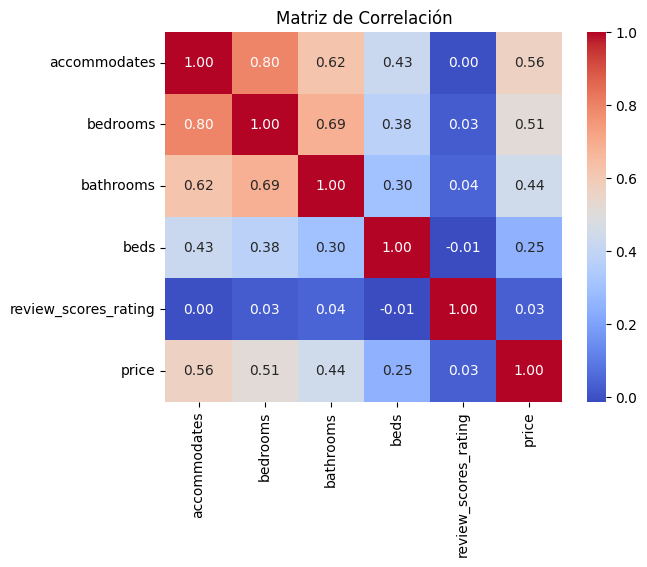

In [ ]:

# Crear la matrix de correlación.es una tabla que muestra la correlación entre todas las variables del conjunto de datos. solo variables numericas
correlation_matrix = df_alojamiento[['accommodates', 'bedrooms','bathrooms', 'beds', 'review_scores_rating','price']].corr()

# Visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") #2f"para que nos muestre los numeros con dos decimales.
plt.title('Matriz de Correlación')
plt.show()


*Una correlación positiva indica que las dos variables tienden a moverse en la misma dirección*

*Una correlación negativa indica que las dos variables tienden a moverse en direcciones opuestas.*

*Los números en el gráfico representan los coeficientes de correlación entre las variables, que varían de -1 a 1. Un valor de 1 indica una correlación positiva fuerte, -1 una correlación negativa fuerte y 0 indica que no hay correlación.*


** interpretación detallada de la matriz de correlación:**

    La variable bedrooms también tiene una correlación positiva con la variable price.
    Esto significa que los alojamientos con más habitaciones tienden a ser más caros.

    La variable accommodates también tiene una correlación positiva con la variable price.
    Esto significa que los alojamientos con mayor capacidad tienden a ser más caros.

    La variable bedrooms tiene una correlación positiva con la variable accommodates.
    Esto significa que los alojamientos con más habitaciones también tienden a tener mayor capacidad.

    La variable review tiene una correlación negativa con la varaibale price.
    Esto significa que los alojamientos con mejores puntuaciones no tienden a ser más caros.

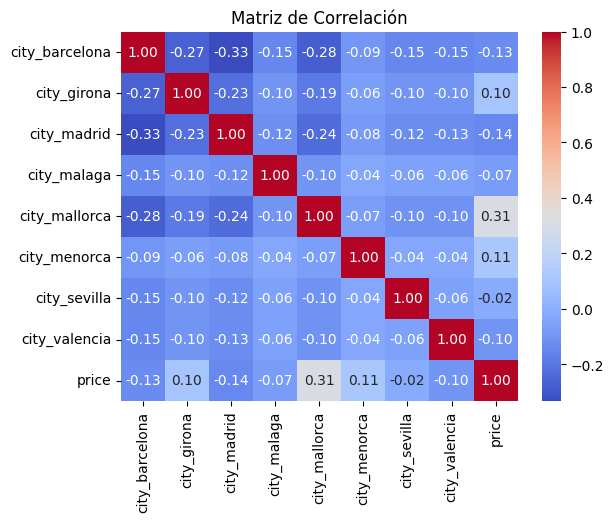

In [ ]:

# Crear la matrix de correlación.es una tabla que muestra la correlación entre todas las variables del conjunto de datos. solo variables numericas
correlation_matrix_city = df_alojamiento[['city_barcelona','city_girona','city_madrid','city_malaga','city_mallorca','city_menorca','city_sevilla','city_valencia','price']].corr()

# Visualizar la matriz de correlación
sns.heatmap(correlation_matrix_city, annot=True, cmap='coolwarm', fmt=".2f") #2f"para que nos muestre los numeros con dos decimales.
plt.title('Matriz de Correlación')
plt.show()

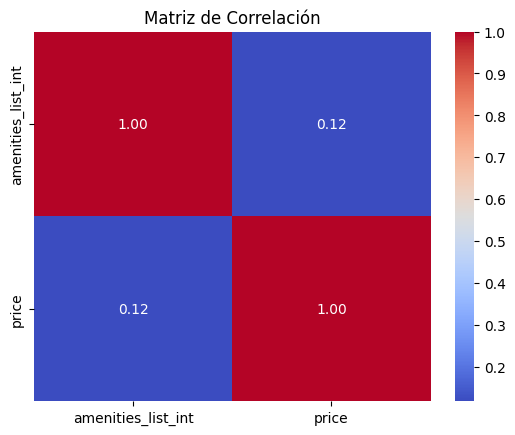

In [ ]:

# Crear la matrix de correlación.es una tabla que muestra la correlación entre todas las variables del conjunto de datos. solo variables numericas
correlation_matrix_amenities = df_alojamiento[['amenities_list_int', 'price']].corr()

# Visualizar la matriz de correlación
sns.heatmap(correlation_matrix_amenities, annot=True, cmap='coolwarm', fmt=".2f") #2f"para que nos muestre los numeros con dos decimales.
plt.title('Matriz de Correlación')
plt.show()

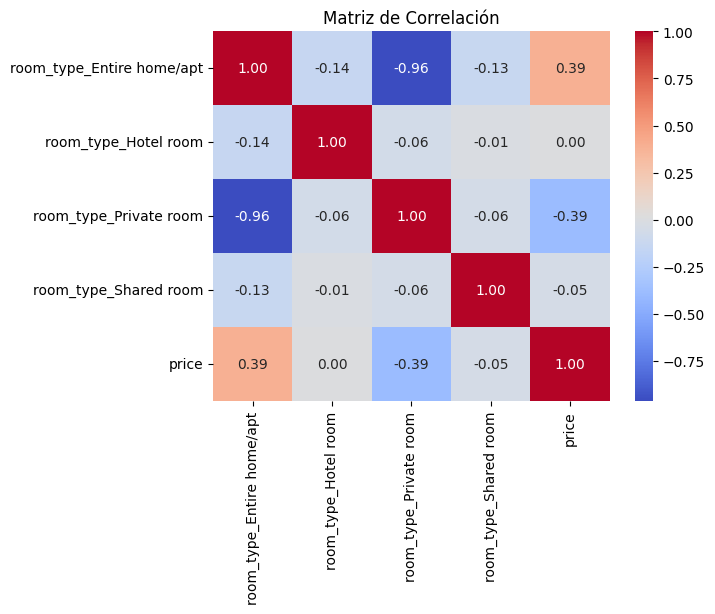

In [ ]:
# Crear la matrix de correlación.es una tabla que muestra la correlación entre todas las variables del conjunto de datos. solo variables numericas
correlation_matrix_roomtype = df_alojamiento[['room_type_Entire home/apt','room_type_Hotel room','room_type_Private room','room_type_Shared room','price']].corr()

# Visualizar la matriz de correlación
sns.heatmap(correlation_matrix_roomtype, annot=True, cmap='coolwarm', fmt=".2f") #2f"para que nos muestre los numeros con dos decimales.
plt.title('Matriz de Correlación')
plt.show()

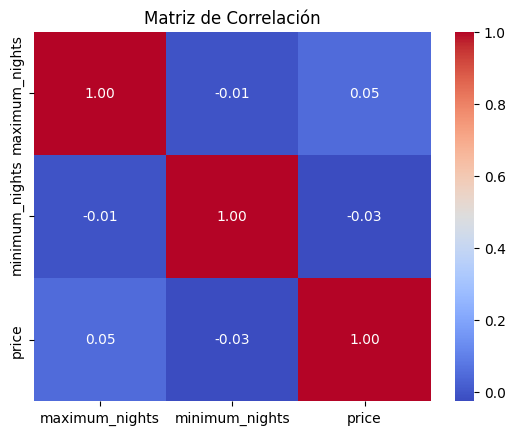

In [ ]:


#  Crear la matrix de correlación.es una tabla que muestra la correlación entre todas las variables del conjunto de datos. solo variables numericas
correlation_matrix_nights = df_alojamiento[['maximum_nights','minimum_nights','price']].corr()
# Visualizar la matriz de correlación
sns.heatmap(correlation_matrix_nights, annot=True, cmap='coolwarm', fmt=".2f") #2f"para que nos muestre los numeros con dos decimales.
plt.title('Matriz de Correlación')
plt.show()

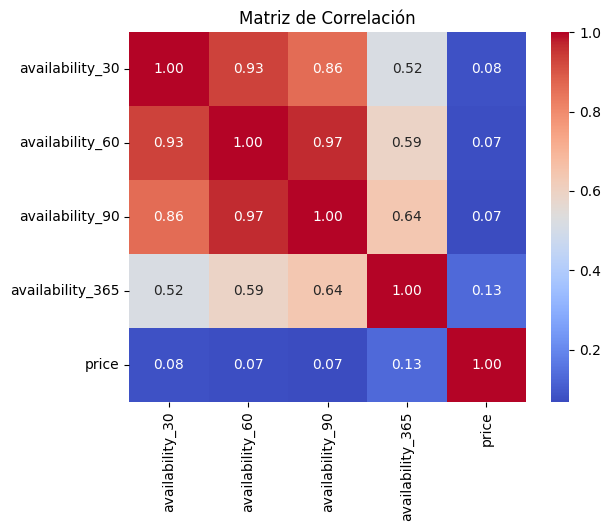

In [ ]:
# Crear la matrix de correlación.es una tabla que muestra la correlación entre todas las variables del conjunto de datos. solo variables numericas
correlation_matrix_availability = df_alojamiento[['availability_30','availability_60','availability_90','availability_365','price']].corr()

# Visualizar la matriz de correlación
sns.heatmap(correlation_matrix_availability, annot=True, cmap='coolwarm', fmt=".2f") #2f"para que nos muestre los numeros con dos decimales.
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
# Crear la matrix de correlación.es una tabla que muestra la correlación entre todas las variables del conjunto de datos. solo variables numericas
correlation_matrix_availability = df_alojamiento[['availability_30','availability_60','availability_90','availability_365','price']].corr()

# Visualizar la matriz de correlación
sns.heatmap(correlation_matrix_availability, annot=True, cmap='coolwarm', fmt=".2f") #2f"para que nos muestre los numeros con dos decimales.
plt.title('Matriz de Correlación')
plt.show()

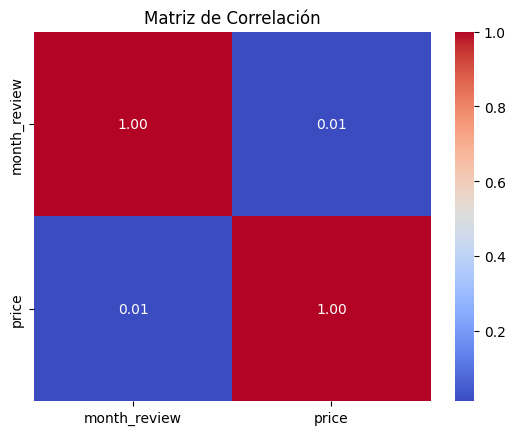

In [ ]:

# # Crear nuevas columnas para el año y el mes de 'insert_date'
# df_alojamiento['year_insertdate'] = df_alojamiento['insert_date'].dt.year
# df_alojamiento['month_insertdate'] = df_alojamiento['insert_date'].dt.month

# Crear la matrix de correlación.es una tabla que muestra la correlación entre todas las variables del conjunto de datos. solo variables numericas
correlation_matrix_last_review_date = df_alojamiento[['month_review', 'price']].corr()

# Visualizar la matriz de correlación
sns.heatmap(correlation_matrix_last_review_date, annot=True, cmap='coolwarm', fmt=".2f") #2f"para que nos muestre los numeros con dos decimales.
plt.title('Matriz de Correlación')
plt.show()

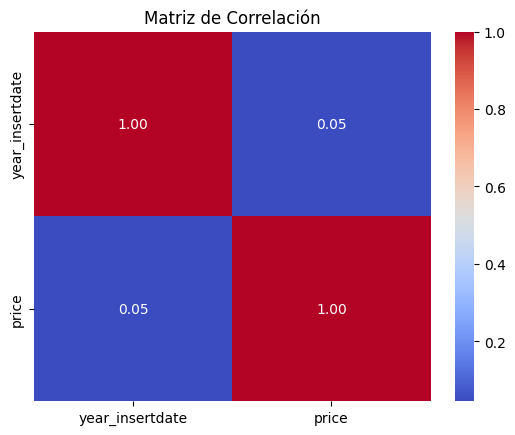

In [ ]:

# Crear la matrix de correlación.es una tabla que muestra la correlación entre todas las variables del conjunto de datos. solo variables numericas
correlation_matrix_insertdate = df_alojamiento[['year_insertdate', 'price']].corr()

# Visualizar la matriz de correlación
sns.heatmap(correlation_matrix_insertdate, annot=True, cmap='coolwarm', fmt=".2f") #2f"para que nos muestre los numeros con dos decimales.
plt.title('Matriz de Correlación')
plt.show()

array([[<Axes: xlabel='accommodates', ylabel='accommodates'>,
        <Axes: xlabel='bedrooms', ylabel='accommodates'>,
        <Axes: xlabel='review_scores_rating', ylabel='accommodates'>,
        <Axes: xlabel='amenities_list_int', ylabel='accommodates'>,
        <Axes: xlabel='price', ylabel='accommodates'>],
       [<Axes: xlabel='accommodates', ylabel='bedrooms'>,
        <Axes: xlabel='bedrooms', ylabel='bedrooms'>,
        <Axes: xlabel='review_scores_rating', ylabel='bedrooms'>,
        <Axes: xlabel='amenities_list_int', ylabel='bedrooms'>,
        <Axes: xlabel='price', ylabel='bedrooms'>],
       [<Axes: xlabel='accommodates', ylabel='review_scores_rating'>,
        <Axes: xlabel='bedrooms', ylabel='review_scores_rating'>,
        <Axes: xlabel='review_scores_rating', ylabel='review_scores_rating'>,
        <Axes: xlabel='amenities_list_int', ylabel='review_scores_rating'>,
        <Axes: xlabel='price', ylabel='review_scores_rating'>],
       [<Axes: xlabel='accommodates', 

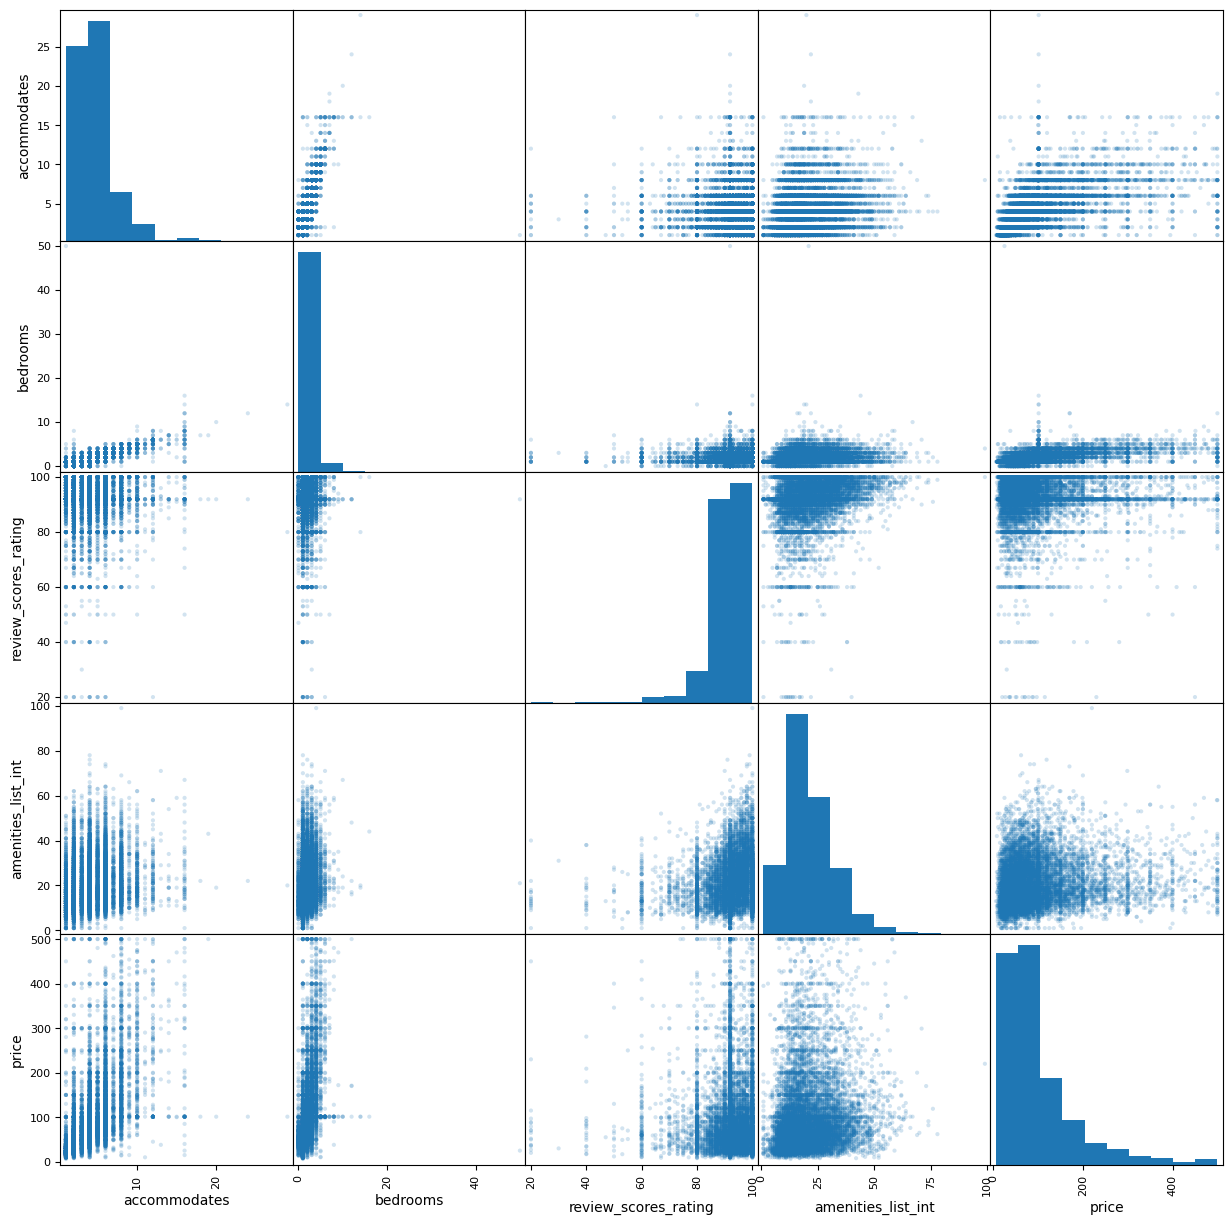

In [ ]:
# ¿Existe alguna otra característica de los precios que se relaciones más con otras variables?

# Vamos a echar un vistazo rápido utilizando el método scatter_matrix que nos representa una dispersión entre todas las variables dos a dos.
# Definir las columnas que te interesan
variables_scatter_matrix = ['accommodates', 'bedrooms', 'review_scores_rating', 'amenities_list_int','price']

# Crear un nuevo DataFrame con estas columnas
df_scatter_matrix = df_alojamiento[variables_scatter_matrix]

# Dibujar la matriz de dispersión
pd.plotting.scatter_matrix(df_scatter_matrix, alpha=0.2, figsize=(15, 15))


In [ ]:
df_alojamiento[['room_type_Entire home/apt','room_type_Hotel room','room_type_Private room','room_type_Shared room', "price"]].corr()

,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,price
room_type_Entire home/apt,1.000000,-0.137418,-0.963018,-0.129695,0.393611
room_type_Hotel room,-0.137418,1.000000,-0.058653,-0.007899,0.003214
room_type_Private room,-0.963018,-0.058653,1.000000,-0.055356,-0.390887
room_type_Shared room,-0.129695,-0.007899,-0.055356,1.000000,-0.050450
price,0.393611,0.003214,-0.390887,-0.050450,1.000000


In [ ]:
df_alojamiento.groupby('room_type')['price'].mean()

room_type
Entire home/apt    123.483317
Hotel room         104.196650
Private room        49.390332
Shared room         51.549098
Name: price, dtype: float64

In [ ]:
df_alojamiento.groupby('city')['price'].mean()

city
barcelona     83.317791
girona       120.128669
madrid        78.540803
malaga        74.544637
mallorca     158.563193
menorca      161.501437
sevilla       95.648261
valencia      64.001465
Name: price, dtype: float64

In [ ]:
df_alojamiento.groupby('amenities_list_int')['price'].mean()

amenities_list_int
1.0      79.731943
2.0      50.181818
3.0      67.736842
4.0      61.516238
5.0      66.329236
           ...    
73.0    170.000000
74.0     86.500000
76.0    119.000000
78.0     62.000000
99.0    220.000000
Name: price, Length: 74, dtype: float64

In [ ]:
df_alojamiento.groupby('review_scores_rating')['price'].mean()

review_scores_rating
20.000000      94.823529
30.000000      30.000000
40.000000      85.842105
47.000000      55.000000
50.000000     114.818182
53.000000      47.000000
55.000000     123.666667
60.000000      94.648352
63.000000     120.000000
64.000000     146.600000
65.000000      55.666667
66.000000      34.000000
67.000000      84.950000
68.000000     118.250000
69.000000     115.666667
70.000000     107.026328
71.000000      62.333333
72.000000      89.384615
73.000000      81.569097
74.000000     154.857143
75.000000      90.651971
76.000000      62.133333
77.000000      79.818182
78.000000      71.500000
79.000000      99.538462
80.000000      98.974784
81.000000      88.824578
82.000000      80.385978
83.000000      95.430556
84.000000      74.666667
85.000000      74.951634
86.000000      90.037266
87.000000      78.539130
88.000000      89.024483
89.000000      74.496641
90.000000     101.273839
91.000000      76.472380
91.929776     123.436444
92.000000      81.864365
93.0

<Axes: xlabel='review_scores_rating'>

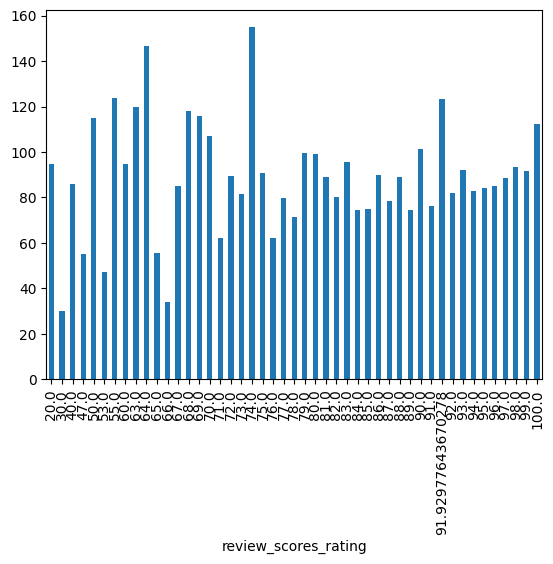

In [ ]:
df_alojamiento.groupby(['review_scores_rating'])['price'].mean().plot.bar()

# Exploración de Patrones a lo Largo del Tiempo:

In [ ]:
# Convertir fechas a datatime
# df_alojamiento['insert_date'] = pd.to_datetime(df_alojamiento['insert_date'])  #  como he eliminado  inser_date tengo que bloquear estos códigos
df_alojamiento['last_review_date'] = pd.to_datetime(df_alojamiento['last_review_date'])


In [ ]:

# # Crear nuevas columnas para el año y el mes de 'insert_date'
# df_alojamiento['year_insertdate'] = df_alojamiento['insert_date'].dt.year
# df_alojamiento['month_insertdate'] = df_alojamiento['insert_date'].dt.month
#  como he eliminado  inser_date tengo que bloquear estos códigos

In [ ]:

# Crear nuevas columnas para el año y el mes de 'last_review_date
df_alojamiento['year_review'] = df_alojamiento['last_review_date'].dt.year
df_alojamiento['month_review'] = df_alojamiento['last_review_date'].dt.month


In [ ]:
# # Encontrar el valor máximo y mínimo insert_date
# max_value = df_alojamiento['insert_date'].max()
# min_value = df_alojamiento['insert_date'].min()

# print('Valor máximo: ', max_value)
# print('Valor mínimo: ', min_value)
#  como he eliminado  inser_date tengo que bloquear estos códigos

Valor máximo:  2021-02-27 00:00:00
Valor mínimo:  2017-01-04 00:00:00


In [ ]:
# Encontrar el valor máximo y mínimo last_review_date
max_value = df_alojamiento['last_review_date'].max()
min_value = df_alojamiento['last_review_date'].min()

print('Valor máximo: ', max_value)
print('Valor mínimo: ', min_value)

Valor máximo:  2021-02-21 00:00:00
Valor mínimo:  2012-11-17 00:00:00


Interpretación: La fecha de insercion y la fecha last review tenga informacion diferente. Es decir, el valor minimo de insert_date que es la fecha de insercion del inmueble, es mayor que el valor minimo de la fecha del last_review

1.   Una probabilidad, es que vengan de los datos de diferentes fuentes o se recopilaron de manera diferente. Algunas posibilidades:

    1.1.   Datos históricos: Podría ser que la fecha de inserción sea la fecha en la que se insertaron los dtos en el dataset, y por tanto, algunos alojamientos ya tuvieran revisiones antes de que se insertaran en la base de datos.

    1.2.   Errores en los datos:Si lo de arriba no se confirma, podría ser que haya un error en los datos. En este caso, necesistaríamos limpiar los datos o revisar cómo se recopilaron.


2.   Conclusión, eliminaría el campo insert_date ya que no se puede obtener información histórica de los inmuebles. Y para trabajar con parametros de temporalidad usaría last_review_date





In [ ]:
df_alojamiento.groupby(['city','year_review'])['price'].mean()

city       year_review
barcelona  2012.0          80.000000
           2013.0         110.000000
           2014.0          67.250000
           2015.0          77.852941
           2016.0          78.219015
                             ...    
valencia   2017.0          59.401386
           2018.0          78.324324
           2019.0          64.461787
           2020.0          57.095220
           2021.0          33.250000
Name: price, Length: 63, dtype: float64

In [ ]:
df_alojamiento[df_alojamiento['city'] == 'girona']['year_review'].value_counts()

2019.0    363
2018.0    312
2020.0    157
2017.0     94
2016.0     24
2015.0      5
2021.0      4
2014.0      1
Name: year_review, dtype: int64

In [ ]:
df_alojamiento[df_alojamiento['city'] == 'girona'].groupby('year_review')['price'].mean()

year_review
2014.0     52.000000
2015.0    203.042218
2016.0    119.625000
2017.0    131.619267
2018.0    116.339245
2019.0    108.556627
2020.0    107.977211
2021.0     62.250000
Name: price, dtype: float64

In [ ]:
# df_alojamiento.groupby(['city','year_review'])['price'].mean().plot.bar()

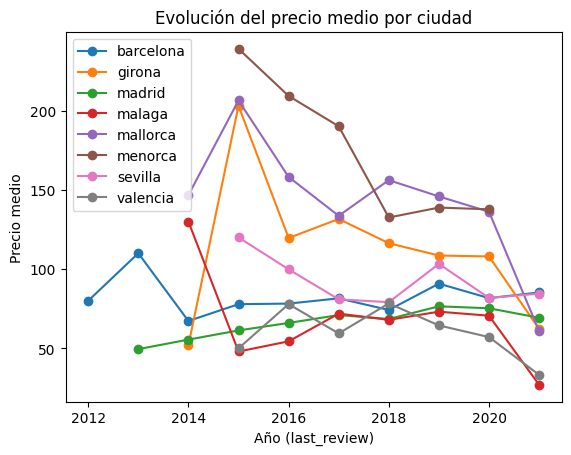

In [ ]:


# Crear una tabla pivotante
pivot_table = df_alojamiento.pivot_table(values='price', index='year_review', columns='city', aggfunc='mean')

# Visualizar la tabla pivotante como un gráfico de líneas
pivot_table.plot(kind='line', marker='o')
plt.xlabel('Año (last_review)')
plt.ylabel('Precio medio')
plt.title('Evolución del precio medio por ciudad')
plt.legend()
plt.show()


**Exploración de relaciones potenciales entre 'price' y otras variables relevantes:**

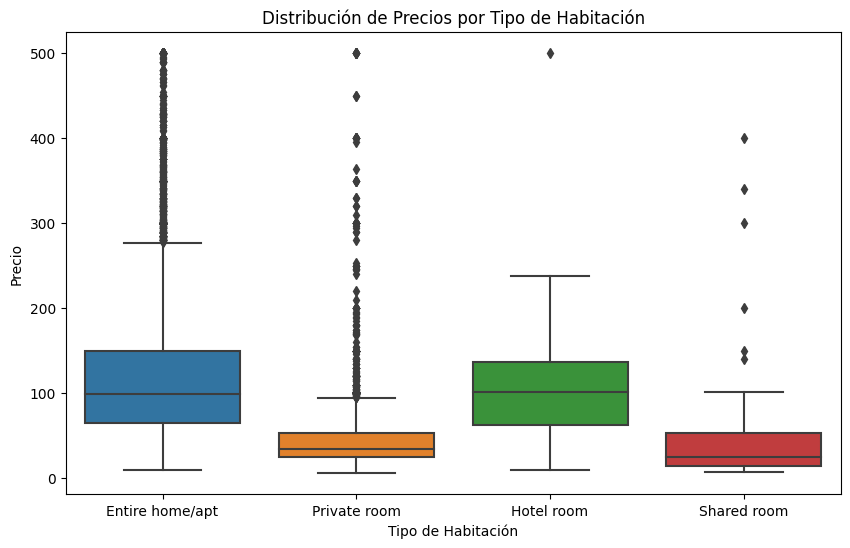

In [ ]:
#Variable roomtype

plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df_alojamiento)
plt.title('Distribución de Precios por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio')
plt.show()



```
La distribución de cajas también muestra que hay una cierta variabilidad en los datos.

Por ejemplo, hay algunos alojamientos de tipo "Entire home/apt" que tienen un precio relativamente bajo.Por ejemplo, un alojamiento de tipo "Entire home/apt" puede tener un precio relativamente bajo si se encuentra en una ubicación rural o si ofrece una calidad baja.

La distribución de cajas muestra que la caja del tipo de habitación "Entire home/apt" está más alta que las cajas de los otros dos tipos de habitaciones. Esto significa que, en general, los alojamientos de tipo "Entire home/apt" tienen un precio más alto.

En general, la distribución de cajas muestra que el tipo de habitación es un factor importante a tener en cuenta al determinar el precio de un alojamiento

```



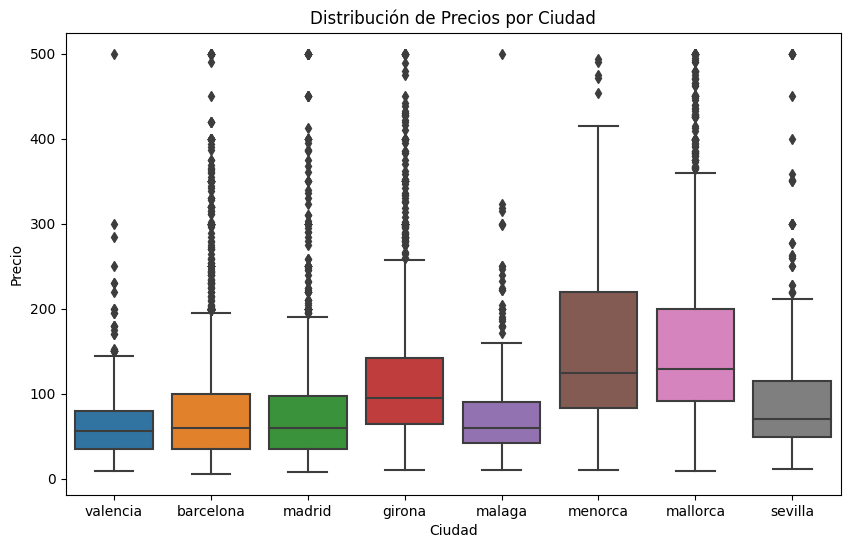

In [ ]:
# Variable Ciudad
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='price', data=df_alojamiento)
plt.title('Distribución de Precios por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio')
plt.show()



```
La distrubicion de cajas muestra que las ciudades con los precios mas altos son menorca y mallorca
```



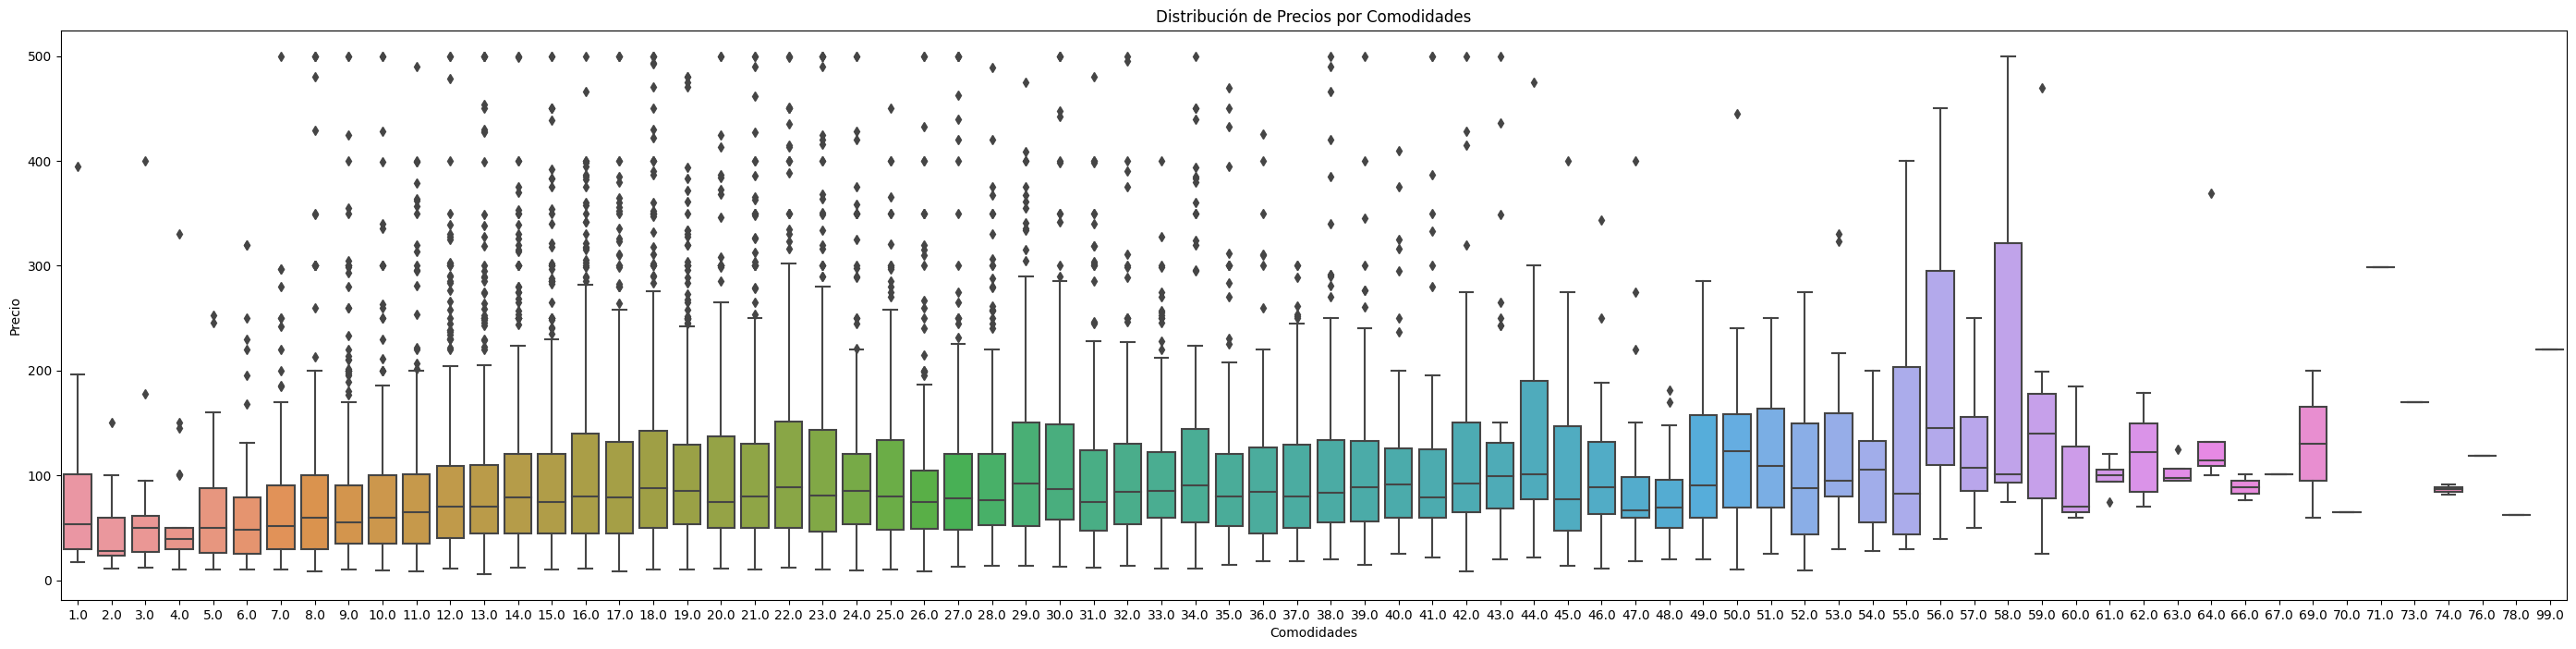

In [ ]:
#Variable amenities_list
df_alojamiento['amenities_list_int'] = df_alojamiento['amenities_list'].str.split(',').str.len()  #(divide cada cadena en la columna ‘amenities_list’ en una lista de comodidades (usando la coma como separador), y luego cuenta el número de comodidades en cada lista con str.len(). El resultado se almacena en la nueva columna ‘amenities_list_int’.)

plt.figure(figsize=(35, 8))
sns.boxplot(x='amenities_list_int', y='price', data=df_alojamiento)
plt.title('Distribución de Precios por Comodidades')
plt.xlabel('Comodidades')
plt.ylabel('Precio')
plt.show()



```
La distribución en cajas muestra que a mayor es el precio mayor es la lsita de comoddaides que tiene el alojiamiento.

Esto tiene sentido, ya que las comodidades adicionales pueden mejorar la experiencia del huésped y hacer que el alojamiento sea más atractivo, lo que permite a los propietarios cobrar precios más altos.

Hay mucha variabiliad de los datos

```



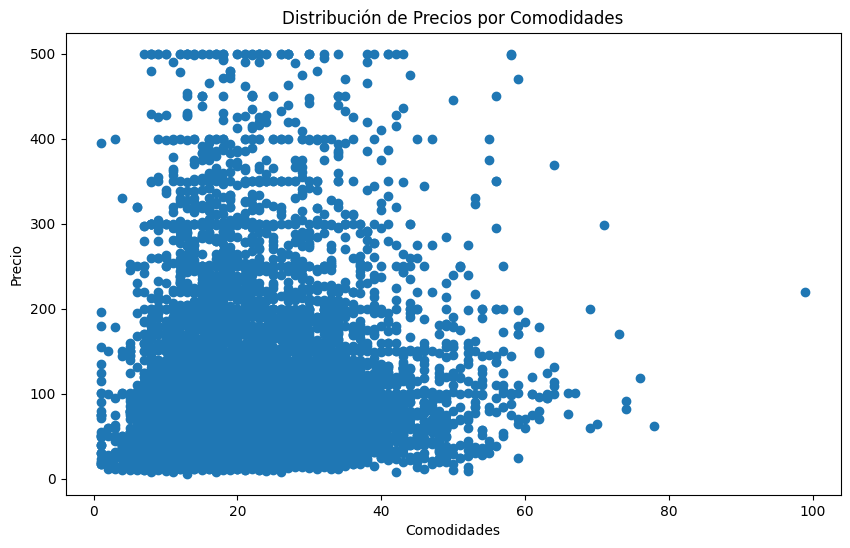

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_alojamiento['amenities_list_int'], df_alojamiento['price'])
plt.title('Distribución de Precios por Comodidades')
plt.xlabel('Comodidades')
plt.ylabel('Precio')
plt.show()

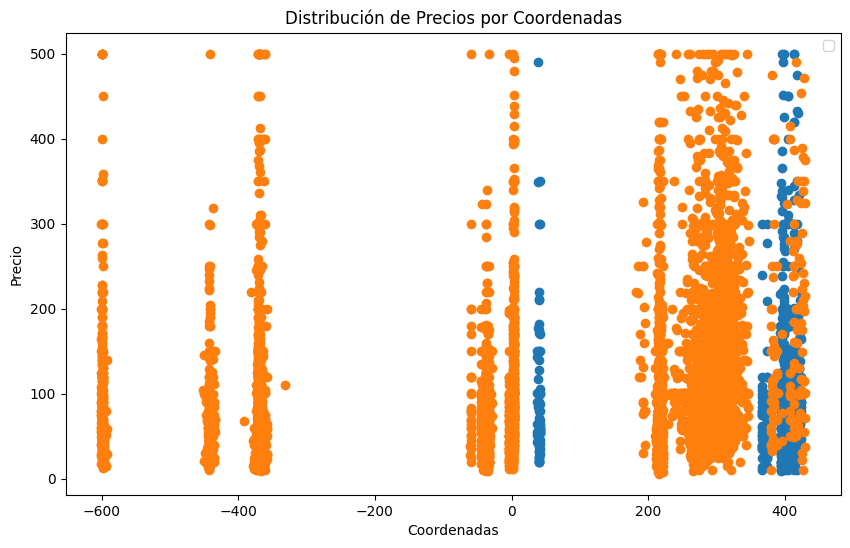

In [ ]:

# df_alojamiento['latitude'] = pd.to_numeric(df_alojamiento['latitude'], errors='coerce')
# df_alojamiento['longitude'] = pd.to_numeric(df_alojamiento['longitude'], errors='coerce')


# plt.figure(figsize=(10, 6))
# plt.scatter(df_alojamiento['latitude'], df_alojamiento['price'])
# plt.scatter(df_alojamiento['longitude'], df_alojamiento['price'])
# plt.title('Distribución de Precios por Coordenadas')
# plt.xlabel('Coordenadas')
# plt.ylabel('Precio')
# plt.legend()
# plt.show()

#  Respuesta preguntas cliente

>



#### ¿Cuántos inmuebles únicos hay en el dataset vs airbnb?

In [ ]:
apartamentos_unicos=df_alojamiento["apartment_id"].nunique()
print(apartamentos_unicos)

In [ ]:
print(f"cantidad de alojamiento únicos en el dataset es: {apartamentos_unicos}")

####  ¿Cual es la diferencia en número de inmuebles posteados entre los 2 datasets?




In [ ]:
#El objetivo de la pregunta es determinar si hay una diferencia en el número de inmuebles publicados entre dos conjuntos de datos. Si hay una diferencia, la pregunta busca determinar el tamaño de esa diferencia.
# Por ejemplo, si los dos conjuntos de datos tienen las mismas columnas, puedo calcular la diferencia en el número de filas. Esto me dará el número total de inmuebles publicados en los dos conjuntos de datos combinados.
# Luego, puedo restar el número de inmuebles publicados en el primer conjunto de datos del número de inmuebles publicados en el segundo conjunto de datos para obtener la diferencia.
# Si los dos conjuntos de datos tienen columnas diferentes, puedo intentar encontrar una columna común que pueda usar para identificar inmuebles únicos.
# Por ejemplo, si los dos conjuntos de datos tienen una columna apartment_id, puedo calcular la diferencia en el número de valores únicos en esa columna.

####  ¿Cuáles son los parámetros que forman el precio?
[Explicación Columnas](https://docs.google.com/document/d/11HcwJDGK_lM_HSBENSbJaLIwFl1P7MXWlnVxMD_AEkg/edit)


**Hipotesis**


Los parámetros que forman el precio de un inmueble pueden dividirse en dos categorías: internos y externos.


**Internos:**
- Tipo de Habitación (room_type): El tipo de habitación ofrecida puede influir en el precio. Por ejemplo, un apartamento completo puede tener un precio más alto que una habitación privada o compartida.- si se confirma esta hipotesis
- Capacidad (accommodates): Cuantas más personas pueda acomodar el apartamento, generalmente más alto será el precio.- si se confirma esta hipotesis
- Número de Baños (bathrooms), Dormitorios (bedrooms) y Camas (beds): Estos factores pueden influir en el precio, ya que más baños, dormitorios y camas pueden aumentar el valor del alquiler.- si se confirma esta hipotesis, aunque cabe destacar que la relacion entre precio y cama es más bajo que el resto.por tanto, se podria decir que una pareja con una cama puede pagar más por otras comodidaes como alojamiento entero, baños, ect..
- Lista de Comodidades (amenities_list): Las comodidades adicionales como Wifi, aire acondicionado, cocina, etc., pueden aumentar el precio del alquiler. - si se confirma, pero veo que la relacion no es muy fuerte.



**Externos:**
- Nombre del Vecindario (neighbourhood_name) y Distrito del Vecindario (neighbourhood_district): La ubicación del apartamento puede tener un gran impacto en el precio. Algunos vecindarios pueden tener precios de alquiler más altos debido a su popularidad, seguridad, proximidad a puntos de interés, etc.-- No lo he podido analizar porque son variables no numericas, pero si he analizado la ciudad, como factor externo, y se aprecia, que en las capitale se relacion con el precio es mas baja que en sitios como las islas baleares
-Puntuaciones de Revisión (review_scores_rating): Las puntuaciones de revisión pueden influir en el precio. Los apartamentos con puntuaciones de revisión más altas pueden cobrar precios más altos.-- podria ser un factor, pero no lo veo con una fuerte relacion

In [ ]:
#Analizar los nulos, todavía no he quitado los nulos, tengo que hacerlo pero antes vamos a analizar la informaicon y luego hacemos este paso previo


> 1.- Primera forma de hacer el analisis de correlación






In [ ]:
#Haremos un análisis de correlación de estos campos con el de precio, para ver si nuestra hipotesis es correcta

# Convertir room_type en variable númerica creaando una nueva columna

# df_alojamiento['room_type_int'] = df_alojamiento['room_type'].replace({'Entire home/apt': 4, 'Private room': 3, 'Hotel room': 2, 'Shared room': 1})

#Crear nueva columna amenities_list para contar los elemetnos de la columna, no se puede usar value.counts, existe una funcion lambda x: len(x) cuenta el número de elementos en cada lista.

#df_alojamiento['amenities_list_int'] = df_alojamiento['amenities_list'].str.split(',').str.len()  #(divide cada cadena en la columna ‘amenities_list’ en una lista de comodidades (usando la coma como separador), y luego cuenta el número de comodidades en cada lista con str.len(). El resultado se almacena en la nueva columna ‘amenities_list_int’.)

# Convertir city en variable númerica creaando una nueva columna

# df_alojamiento['city_int'] = df_alojamiento['city'].replace({'barcelona': 8, 'madrid': 7, 'mallorca': 6, 'girona': 5, 'valencia': 4, 'sevilla': 3, 'malaga': 2, 'menorca': 1})


# # Agrupar en una lista las columnas que me interesan
# parametros_precio = ['room_type_int', 'accommodates', 'bathrooms', 'bedrooms', 'beds','amenities_list_int','neighbourhood_name', 'city_int','neighbourhood_district', 'review_scores_rating', 'price']

#nota: 'room_type' al ser un objeto como no puede hacer la correlación no me la cuenta. Podrias crear una columna nueva para y darle un valor númerico a cada tipo para que así me cuente las columnas. Lo mismo me pasa con 'amenities_list','neighbourhood_name', 'neighbourhood_district. Lo hago antes de crear la variable parametro



# # Crea un nuevo DataFrame con estas columnas
# df_precio= df_alojamiento[parametros_precio]

# # Analisis correlación df_precio
# df_precio.corr()

# df_precio.dtypes


> 2.- Segunda forma de hacer el analisis de correlación


In [ ]:
#Haremos un análisis de correlación de estos campos con el de precio, para ver si nuestra hipotesis es correcta

# Crear columnas one-hot para room_type
room_type_dummies = pd.get_dummies(df_alojamiento['room_type'], prefix='room_type')

# Añadir las nuevas columnas a tus datos
df_alojamiento = pd.concat([df_alojamiento, room_type_dummies], axis=1)

##Crear nueva columna amenities_list para contar los elemetnos de la columna, no se puede usar value.counts, existe una funcion lambda x: len(x) cuenta el número de elementos en cada lista.

df_alojamiento['amenities_list_int'] = df_alojamiento['amenities_list'].str.split(',').str.len()  #(divide cada cadena en la columna ‘amenities_list’ en una lista de comodidades (usando la coma como separador), y luego cuenta el número de comodidades en cada lista con str.len(). El resultado se almacena en la nueva columna ‘amenities_list_int’.)

# Crear columnas one-hot para la ciudad
city_dummies = pd.get_dummies(df_alojamiento['city'], prefix='city')

# Añadir las nuevas columnas a tus datos
df_alojamiento = pd.concat([df_alojamiento, city_dummies], axis=1)

# Crear columnas one-hot para la ciudad
city_dummies = pd.get_dummies(df_alojamiento['city'], prefix='city')

# Añadir las nuevas columnas a tus datos
df_alojamiento = pd.concat([df_alojamiento, city_dummies], axis=1)

# Aplicar get_dummies a la columna 'city'
# df_alojamiento = pd.get_dummies(df_alojamiento, columns=['city'], prefix='city', drop_first=True)

# Agrupar en una lista las columnas que me interesan
parametros_precio = ['accommodates', 'bathrooms', 'bedrooms', 'beds','amenities_list_int','neighbourhood_name','city_barcelona','city_girona','city_madrid','city_malaga','city_mallorca','city_menorca','city_sevilla','city_valencia','room_type_Entire home/apt','room_type_Hotel room','room_type_Private room','room_type_Shared room', 'review_scores_rating', 'price']

#nota: 'room_type' al ser un objeto como no puede hacer la correlación no me la cuenta. Podrias crear una columna nueva para y darle un valor númerico a cada tipo para que así me cuente las columnas. Lo mismo me pasa con 'amenities_list','neighbourhood_name', 'neighbourhood_district. Lo hago antes de crear la variable parametro


# Crea un nuevo DataFrame con estas columnas
df_precio= df_alojamiento[parametros_precio]

# Analisis correlación df_precio
df_precio.corr()



Interpretación:


*   Un coeficiente de correlación cercano a 1 indica una fuerte correlación
positiva: a medida que una variable aumenta, la otra también tiende a aumentar.
*   Un coeficiente cercano a -1 indica una fuerte correlación negativa: a medida que una variable aumenta, la otra tiende a disminuir.
*   Un coeficiente cercano a 0 indica que no hay una relación lineal fuerte entre las variables.







Por ejemplo,

*   accommodates (Capacidad): Número máximo de personas que el apartamento puede acomodar.

*    la fila **accommodates **representa la relación entre el número de personas que un alojamiento puede acomodar (“accommodates”) y las otras variables del DataFrame.
*   Cada valor en esta fila es un coeficiente de correlación que mide la relación lineal entre “accommodates” y la variable correspondiente.
*   Si el coeficiente de correlación entre “accommodates” y “bathrooms” es cercano a 1, esto sugeriría que los alojamientos que pueden acomodar a más personas tienden a tener más baños.
*   si el coeficiente de correlación entre ‘accommodates’ y ‘room_type_Entire home/apt’ es positivo y cercano a 1, esto sugeriría que los alojamientos que pueden acomodar a más personas tienden a ser de tipo ‘Entire home/apt’. Un coeficiente de correlación negativo y cercano a -1 sugeriría lo contrario.
*  Si el coeficiente de correlación entre ‘accommodates’ y, por ejemplo, ‘city_menorca’ es positivo y cercano a 1, esto sugeriría que los alojamientos que pueden acomodar a más personas tienden a estar en Menorca. Un coeficiente de correlación negativo y cercano a -1 sugeriría lo contrario, como city_valencia: los alojamientos que pueden acomodar a más personas tienden a no estar en Valencia.


```
# Algo que habria que analizar en detalle es que la relacion lineal entre acoomodates y los reviews tiende a ser baja. Y arriba, hemos visto que la mayoria de los review son de puntutaciones altas.
```










Para analizar más a fondo las valoraciones de los alojamientos, podria considerar:

**Analizar las valoraciones en función del tamaño del alojamiento**: dividir los datos en grupos según el número de personas que cada alojamiento puede acomodar y luego calcular la puntuación media de las valoraciones para cada grupo.


**Analizar las valoraciones en función del tipo de alojamiento:** dividir los datos en grupos según el tipo de alojamiento (por ejemplo, ‘Entire home/apt’, ‘Private room’, etc.) y luego calcular la puntuación media de las valoraciones para cada grupo.

**Analizar las valoraciones en función de la ciudad:** dividir los datos en grupos según la ciudad y luego calcular la puntuación media de las valoraciones para cada grupo.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#tipos de graficos en plot #bar, pie, area, density , box, hist, line

In [ ]:
# Analizar las valoraciones en función del tamaño del alojamiento
media_tamaño = df_alojamiento.groupby('accommodates')['review_scores_rating'].mean()

# Crear un gráfico de barras a partir de los resultados del groupby
media_tamaño.plot(kind='line')

# Mostrar el gráfico
plt.show()


Las que mejor review reciben son cuando el sesgo de personas acomodadas oscila entre 10 y 15. Las que pero por debajo de 25.

**Conclusión**: Cuanto mayor sea el número de personas que se acomodan en el alojamiento peor es la calificación. Por esa la relación es positiva, pero no tiene una fuerte vinculación.

In [ ]:
# Analizar las valoraciones en función del tipo de alojamiento
media_tipo = df_alojamiento.groupby('room_type')['review_scores_rating'].mean()

# Crear un gráfico de barras a partir de los resultados del groupby
media_tipo .plot(kind='bar')

# Mostrar el gráfico
plt.show()


# Crear una tabla dinámica
pivot_table_tipo = df_alojamiento.pivot_table(index='review_scores_rating', columns='room_type', aggfunc='size')
# Crear un gráfico de barras a partir de los resultados del pivot_table
pivot_table_tipo.plot(kind='line')

# Mostrar el gráfico
plt.show()


La conclusion que obtengo es que los review segun el tipo de habitacion varia, si se trata de un aprtamento la valoracion empeiza desde 20 y acaba en 100. reciben más puntuaciones de 90. En el caso de Hotel y Shared room, las puntuacones comienzan en 85 a 100, y la mayor puntuacion está por encima de 90. Luego, en el caso de private la valoracion empieza en 40, y  la mayor puntuacion está por encima de 90

**Conclusion**: El review de hotel y shared son negativos porque el numero de registros es mucho menor que el resto por eso sale negativo.

In [ ]:

# Analizar las valoraciones en función de la ciudad
media_ciudad = df_alojamiento.groupby('city')['review_scores_rating'].mean()

# Crear un gráfico de barras a partir de los resultados del groupby
media_ciudad.plot(kind='bar')

# Mostrar el gráfico
plt.show()



# # Crear una tabla dinámica
# pivot_table_city = df_alojamiento.pivot_table(index='city', columns='review_scores_rating', aggfunc='size')
# # Crear un gráfico de barras a partir de los resultados del pivot_table
# pivot_table_city.plot(kind='bar')

# # Mostrar el gráfico
# plt.show()


#Para agrupar los valores de ‘review_scores_rating’ en intervalos, puedo usar la función cut de pandas.

# Definir los bordes de los intervalos
bins = [0, 20, 40, 60, 80, 100]

# Crear una nueva columna con los valores de 'review_scores_rating' agrupados en intervalos
df_alojamiento['review_scores_rating_grouped'] = pd.cut(df_alojamiento['review_scores_rating'], bins)

# Crear una tabla dinámica
pivot_table_city = df_alojamiento.pivot_table(index='city', columns='review_scores_rating_grouped', aggfunc='size')

# Crear un gráfico de líneas a partir de los resultados del pivot_table
pivot_table_city.plot(kind='bar')

# Mostrar el gráfico
plt.show()

la connclusion que saco es qe las que mayo reciben puntuacion por encima de 80 es la ciudad de Barcelona, pero tambien es la que mas recibe review entre 60,80, y 40 y 60.  Tambien puede ser porque donde hay más registros

Para analizar más a fondo las valoraciones de los alojamientos, podria considerar:

**Analizar las valoraciones en función del tamaño del alojamiento**: dividir los datos en grupos según el número de personas que cada alojamiento puede acomodar y luego calcular la puntuación media de las valoraciones para cada grupo.


**Analizar las valoraciones en función del tipo de alojamiento:** dividir los datos en grupos según el tipo de alojamiento (por ejemplo, ‘Entire home/apt’, ‘Private room’, etc.) y luego calcular la puntuación media de las valoraciones para cada grupo.

**Analizar las valoraciones en función de la ciudad:** dividir los datos en grupos según la ciudad y luego calcular la puntuación media de las valoraciones para cada grupo.

Me llama la atención que la relacion lineal entre precio y las variables city, en las capitales principales son negativos

**Analisis descriptivo**: Calcular la media, la mediana, el rango, la desviación estándar y los percentiles.

In [ ]:
# Calcular estadísticas descriptivas para el precio en cada ciudad
estadisticas = df_alojamiento.groupby('city')['price'].describe()

# Mostrar las estadísticas
print(estadisticas)

Interpretación, por ejemplo
**Barcelona**: Con 2823 alojamientos, el precio medio es de 83.32€, con una desviación estándar de 74.80€. El precio mínimo es de 6€, el 25% de los alojamientos cuestan 35€ o menos, la mediana es de 60€, el 75% de los alojamientos cuestan 100€ o menos, y el precio máximo es de 500€.

**Conclusión**: Se aprecia que la relacion lineal entre el precio y las ciudades, es verdad, ya que las ciudades en las que el precio es mayor es menorca, y mallorca


### ¿Son iguales los parámetros en ambas fuentes de datos?

In [ ]:
# Comparar ambas dataset  usar el método columns para obtener una lista de columnas.

### ¿Has podido ver algún inmueble que está en ambas fuentes de datos?, es su valoración la misma?

In [ ]:
#  funciones de comparación para identificar inmuebles comunes y comparar sus valoraciones

#Hacer un join por algún id quizás el apartament_id

#comparar las columnas de review creando una columna con la diferencia de precios


### ¿En qué fuentes de datos hay más volatilidad en cuanto al precio? , hay algún tipo de estacionalidad?

In [ ]:
# Utiliza estadísticas descriptivas y gráficos de series temporales para explorar la volatilidad y posibles patrones estacionales.

#Votalidad del precio se suele calcular con una desviación estándar

#estacionalidad, calcularla sobre el período del año en que se registraron las reservas, así se podrían buscar si hay patrones estacionales en los precios o en la demanda de alojamientos. ( insert_date, first_review_date, o last_review_date)

NOTA **Para** determinar la estacionalidad, se necesitaría una columna que indique la fecha en que se reservó el inmueble. en nuestro dataset solo tengo insert_date

# Crea un dataset único de verdad

In [ ]:
# Usar funciones como merge o concat para combinar los datasets en uno único.

### ¿Hay alguna variable que podríamos añadir para mejorar el análisis?


In [ ]:
#Examinar las variables disponibles y considera si hay datos adicionales que podrían enriquecer tu análisis.

# Ubicación geográfica:

#     Explorar variables como el barrio, la ciudad o las coordenadas geográficas para analizar patrones espaciales en los precios y otras variables.

# Reviews:

#     Considerar la inclusión de variables relacionadas con la satisfacción del cliente o la calidad percibida.

# Características adicionales de la propiedad:

#     Analizar variables como la presencia de comodidades (piscina, estacionamiento, wifi, etc.) o características especiales.

# Tendencias del mercado inmobiliario:

#     Considerar incorporar variables que reflejen la dinámica del mercado a nivel español.

# Eventos locales:

#     Hay eque podrían influir en la demanda de alojamientos? Explorar variables que indiquen la proximidad aventos locales (conciertos, festivales, conferencias)

### ¿Puedes hacer un ranking de los inmuebles más caros?


In [ ]:
# Ordenar el dataset por la columna de precio en orden descendente.

### ¿Cuáles son los inmuebles más rentables?


In [ ]:
#definir la rentabilidad

#buscar métricas o parametros que nos permitan conocer esta información:

# por Ejemplo

# Análisis de ocupación:

#     Evaluar la rentabilidad considerando la ocupación del inmueble. Por ejemplo,  calcular la proporción de días ocupados en un año.

# df_alojamiento['ocupacion_anual'] = 365 - df_alojamiento['availability_365']
# df_alojamiento['ocupacion_anual'] * precio
# df_alojamiento['rentabilidad_ocupacion'] = df_alojamiento['ocupacion_anual'] / 365


# Precio relativo:

#     Comparar el precio de alquiler con el precio promedio en la región para identificar inmuebles que ofrezcan una buena relación calidad-precio.

# df_alojamiento['precio_rel'] = df_alojamiento['price'] / df_alojamiento['price'].mean()

# print(df_alojamiento['precio_rel'])


### Teniendo en cuenta todo el conocimiento adquirido , cuales son tus sugerencias a la hora de adquirir 200 viviendas para destinarlas a alquiler turístico. ¿Qué criterios has elegido?